
#<font color='blue'> **Introducción a la Transformada de Fourier Continua y Discreta y a sus Aplicaciones**</font>

Luis Villaseñor

Fecha de actualización: 15 de junio de 2022



<hr style="border:2px solid gray"> </hr>

# **$\color{blue}{\text{1. La transformada de Fourier}}$**
<hr style="border:2px solid gray"> </hr>


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.1 Introducción a la transformada de Fourier}}$
<hr style="border:2px solid gray"> </hr>

Una onda senoidal o cosenoidal pura se describe por su amplitud A, su frecuencia f y su fase $\phi$.

Por ejemplo 

$$
x(t) = Acos(2\pi ft -\phi)
$$

La frecuencia $f$ nos da el número de veces que la onda hace una oscilación completa en un segundo (ciclos/s). La amplitud indica el máximo valor de la magnitud de la oscilación y la fase nos dice el valor de la oscilación al tiempo cero.

Si el periodo es T, entonces

$$ 
f=\frac{1}{T}
$$

El factor $2\pi$ nos convierte la frecuencia de ciclos/s a radianes/s

$$
\omega = 2\pi f = \frac{2\pi}{T}
$$

Una fase de $\pi/2$ desplaza la onda una cuarta parte del periodo  ($2\pi$) hacia la derecha y nos convierte la onda cosenoidal en onda senoidal.

Usando

$$
cos(a+b) = cos(a) cos(b) - sen(a) sen(b)
$$

vemos que

$$
x(t) = Acos(2\pi ft -\phi) = Acos(2\pi ft)cos(\phi)+Asin(2\pi ft)sin(\phi)
$$

Es decir que cambios de la fase se reflejan en cambios de amplitudes en las señales y en cambios de senos y cosenos pero no se cambia la frecuencia.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x(t):
    return (abs(t) < 2).astype(float)*np.cos(2*np.pi*t-np.pi/2)

t = np.linspace(-10,10,1000)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t))
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()

plt.show()

Cuando superponemos varias ondas de diferentes frecuencias y diferentes amplitudes la onda resultante resulta dificil de interpretar en cuanto a su composición

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x(t):
    return (abs(t) < 5).astype(float)*(np.cos(2*np.pi*t)+2*np.cos(2*np.pi*2*t)+3*np.sin(10*np.pi*2*t))

t = np.linspace(-10,10,1000)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t))
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()

plt.show()

Sería útil tener una herramienta que nos ayude a entender la composición de las señales. 

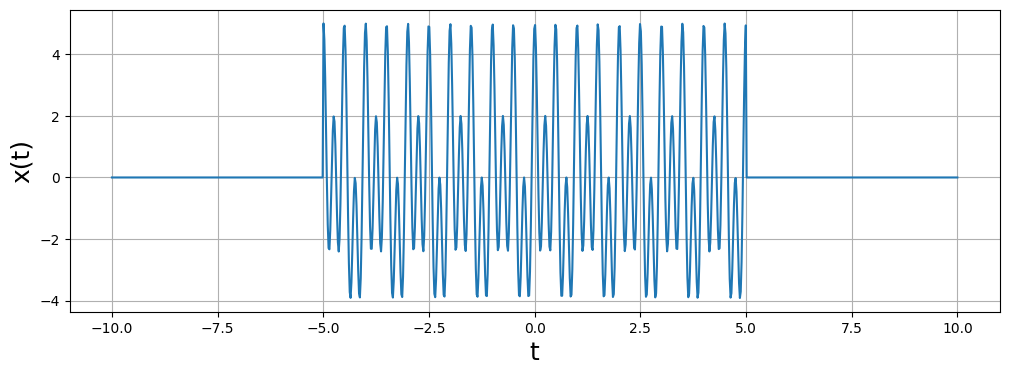

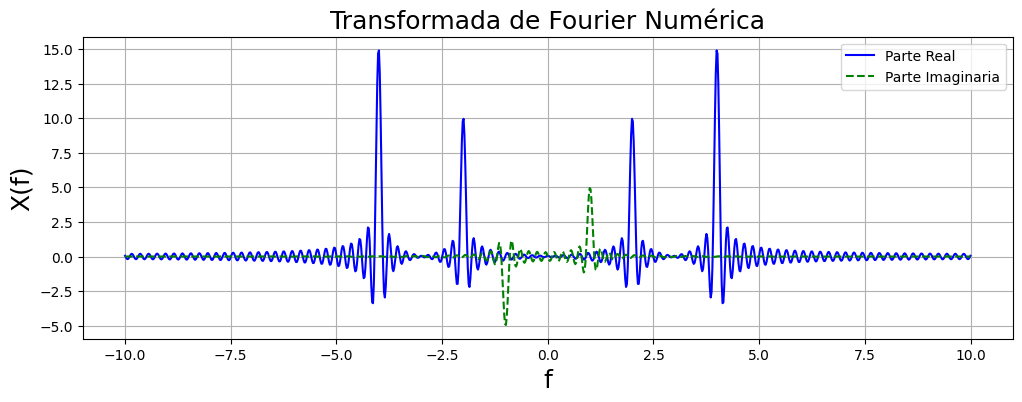

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x(f):
    return (abs(t) < 5).astype(float)*(np.sin(2*np.pi*t)+2*np.cos(2*np.pi*2*t)+3*np.cos(2*np.pi*4*t))
def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(2*np.pi*1.j*f1*t))
    return Y*dt
t = np.linspace(-10,10,1000)
f = np.linspace(-10,10,1000)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t))
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(Fourier(x,t,f)),'-b',label='Parte Real')
ax.plot(f, np.imag(Fourier(x,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada de Fourier Numérica', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.show()

Esta herramienta se llama transformada de Fourier.


La transformada de Fourier es análoga a un prisma en cuanto a que nos descompone una señal en sus componentes de diferentes frecuencias.




In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://cdn.britannica.com/78/149178-050-F2421B64/light-prism-color-angle-colors-wavelength-wavelengths.jpg",width=300, height=300)

Podemos reconstruir la señal original a partir de su transformada de Fourier usando la operación inversa, es decir la transformada inversa de Fourier.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x(t):
    return (abs(t) < 5).astype(float)*(np.sin(2*np.pi*t)+2*np.cos(2*np.pi*2*t)+3*np.cos(2*np.pi*4*t))
def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X,np.exp(2*np.pi*1.j*f*t1))
    return Y*df

t = np.linspace(-10,10,1000)
f = np.linspace(-10,10,1000)

X = Fourier(x,t,f)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t))
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(Fourier(x,t,f)),'-b',label='Parte Real')
ax.plot(f, np.imag(Fourier(x,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada de Fourier Numérica', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, np.real(Fourier_Inversa(X,t,f)),'-b',label='Parte Real')
ax.plot(t, np.imag(Fourier_Inversa(X,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada Inversa de Fourier Numérica', fontsize=18)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.2 Aplicación de la TF como filtro}}$
<hr style="border:2px solid gray"> </hr>

Pero también podemos reconstruir la señal original a partir de  modificaciones de la transformada de Fourier, por ejemplo filtrar frecuencias bajas o frecuencias altas. Veamos un filtro pasa bajos que nos elimina las frecuencias mayores a 1 Hz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x(t):
    return (abs(t) < 5).astype(float)*(np.sin(2*np.pi*t)+2*np.cos(2*np.pi*2*t)+3*np.cos(2*np.pi*4*t))
def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X,np.exp(2*np.pi*1.j*f*t1))
    return Y*df

t = np.linspace(-10,10,1000)
f = np.linspace(-10,10,1000)

X = Fourier(x,t,f)
X[0:440]=0
X[-440:-1]=0


fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t))
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(X),'-b',label='Parte Real')
ax.plot(f, np.imag(X),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada de Fourier Numérica', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, np.real(Fourier_Inversa(X,t,f)),'-b',label='Parte Real')
ax.plot(t, np.imag(Fourier_Inversa(X,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada Inversa de Fourier Numérica', fontsize=18)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.show()

o por ejemplo un filtro pasa altos que nos elimine las frecuencias inferiores a 4 Hz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x(t):
    return (abs(t) < 5).astype(float)*(np.sin(2*np.pi*t)+2*np.cos(2*np.pi*2*t)+3*np.cos(2*np.pi*4*t))
def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X,np.exp(2*np.pi*1.j*f*t1))
    return Y*df

t = np.linspace(-10,10,1000)
f = np.linspace(-10,10,1000)

X = Fourier(x,t,f)
X[275:725]=0


fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t))
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(X),'-b',label='Parte Real')
ax.plot(f, np.imag(X),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada de Fourier Numérica', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, np.real(Fourier_Inversa(X,t,f)),'-b',label='Parte Real')
ax.plot(t, np.imag(Fourier_Inversa(X,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada Inversa de Fourier Numérica', fontsize=18)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.3 Aplicación de la TF para quitar ruido}}$
<hr style="border:2px solid gray"> </hr>

Ahora veamos una aplicación para quitar ruido a una serie de datos 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x(t):
    return (abs(t-.5) < .5).astype(float)*(np.cos(2*np.pi*20*t)+np.cos(2*np.pi*70*t))

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x,np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X,np.exp(2*np.pi*1.j*f*t1))
    return Y*df

t = np.linspace(-.5,1.5,2000)
f = np.linspace(-100,100,2000)

Señal = x(t)
Ruido = (abs(t-.5) < .5).astype(float)*np.random.randn(len(t))

X = Fourier(Señal+Ruido,t,f)
X_filtrada = X*(np.abs(X)>.10)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t),'-b',label='Señal',lw=1)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
plt.legend()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t),'-b',label='Señal',lw=1)
plt.plot(t, x(t)+Ruido,'-g',label='Señal + Ruido',lw=.5)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
plt.legend()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(X),'-b',label='Parte Real')
ax.plot(f, np.imag(X),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada de Fourier Numérica', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(X_filtrada),'-b',label='Parte Real')
ax.plot(f, np.imag(X_filtrada),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada de Fourier Numérica Filtrada', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, np.real(Fourier_Inversa(X_filtrada,t,f)),'-b',label='Parte Real')
ax.plot(t, np.imag(Fourier_Inversa(X_filtrada,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada Inversa de Fourier Numérica', fontsize=18)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.show()

Estas mismas ideas se pueden aplicar a imágenes para filtrar los espectros de frecuencias para detectar fronteras o quitar ruido en imágenes, como van a ver en la siguiente tarea.

Como veremos más adelante, la transformada de Fourier es especialmente útil para resolver ecuaciones diferenciales ordinarias y parciales.





<hr style="border:2px solid gray"> </hr>

$\color{green}{\text{Tarea del 16 de febrero de 2022}}$
<hr style="border:2px solid gray"> </hr> 

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.4 Definición}}$
<hr style="border:2px solid gray"> </hr>

La transformada de Fourier, llamada en honor del matemático francés Joseph Fourier(1768-1830), es una transformación matemática que nos permite cambiar  señales del dominio del tiempo (o del espacio) al dominio de la frecuencia temporal (o frecuencia espacial).

La transformada de Fourier de la función $x(t)$ se define como

$$ 
X(f) = \int_{-\infty}^{\infty}x( t)e^{-i2\pi  f t}dt 
$$

En general la transformada de Fourier es una función compleja de la frecuencia $f$ ya que por la fórmula de Euler 

$$
e^{i2\pi  f t} = cos(2\pi  f t) + i sin(2\pi  f t)
$$

donde 

$$
i=\sqrt{-1}
$$

Si conocemos la transformada de Fourier $X(f)$ podemos recuperar $x(t)$ a través de la transformada inversa de Fourier definida por

$$ 
x(t) = \int_{-\infty}^{\infty}X( f)e^{i2\pi  f t}df 
$$

La función $x(t)$ puede ser real o compleja pero la variable $t$ es real y 
$f$ representa la frecuencia dada en ciclos/s (Hz).


Para una señal senoidal o cosenoidal pura

$$
f = \frac{1}{T}
$$

donde $T$ es es periodo de la señal.

Nótese el cambio de signo en la exponencial.







<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.5 Delta de Dirac}}$
<hr style="border:2px solid gray"> </hr>

Una representación integral de la delta de Dirac $\delta(t-t_1)$

es la siguiente:

$$
\delta(t-t_1)= \int_{-\infty}^{\infty}e^{i2\pi  f (t-t_1)}df
$$

Su principal propiedad es que 

$$
\int_{-\infty}^{\infty}x( t)\delta(t-t_1)dt = x(t_1)
$$

Usando esta representación de la delta de Dirac podemos comprobar que la transformada inversa de Fourier es en efecto el operador inverso de la transformada de Fourier.

Sustituyendo la expresión para la transformada de Fourier usando como variable de integración $t_1$ 

$$ 
X(f) = \int_{-\infty}^{\infty}x( t_1)e^{-i2\pi  f t_1}dt_1 
$$

en la fómula para la transformada inversa obtenemos

$$
\int_{-\infty}^{\infty}X( f)e^{i2\pi  f t}df = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x( t_1)e^{-i2\pi  f t_1} dt_1e^{i2\pi  f t}df
$$

Agrupando las integrales obtenemos y usando la representación integral de la delta de Dirac se obtiene

$$
\int_{-\infty}^{\infty}X( f)e^{i2\pi  f t}df =\int_{-\infty}^{\infty}x( t_1)dt_1\int_{-\infty}^{\infty}e^{i2\pi  f (t-t_1)}df
$$


o sea

$$
\int_{-\infty}^{\infty}X( f)e^{i2\pi  f t}df =\int_{-\infty}^{\infty}x( t_1)dt_1\delta(t-t_1) = x(t)
$$

de modo que en efecto la definición de transformada inversa de Fourier corresponde al operador inverso de la transformada de Fourier.


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.6 Transformada de Fourier del  seno y del coseno}}$
<hr style="border:2px solid gray"> </hr>

Ahora usamos la definición para  calcular la transformada de Fourier de la función 


$$
x(t) = sen (2\pi  f_0 t)
$$

Por la fórmula de Euler obtenemos

$$
e^{i\theta} - e^{-i\theta} = 2isen(\theta)
$$

sustituyendo en la fórmula de la transformada de Fourier

obtenemos

$$ 
X(f) = \frac{1}{2i}\int_{-\infty}^{\infty}e^{-i2\pi  (f-f_0) t}dt-\frac{1}{2i}\int_{-\infty}^{\infty}e^{-i2\pi  (f+f_0) t}dt
$$

o sea

$$
X(f) = \frac{1}{2i}\delta(f-f_0) - \frac{1}{2i}\delta(f+f_0)
$$

$$
X(f) =\frac{i}{2}\delta(f+f_0) - \frac{i}{2}\delta(f-f_0)
$$

En modo similar la transformada de Fourier del 

$$
x(t) = cos (2\pi  f_0 t)
$$
 
la obtenemos usando la fórmula de Euler para expresar el coseno como suma de dos exponenciales 

$$
e^{i\theta}= cos(\theta) +isen(\theta)
$$

junto con 
$$ cos(-\theta) = cos(\theta)$$
y $$ sen(-\theta) = -sen(\theta)$$

vemos que 

$$
e^{i\theta} + e^{-i\theta} = 2cos(\theta)
$$

Sustituyendo 

$$cos(2\pi  f_0 t) =\frac{ e^{i2\pi  f_0 t} + e^{-i2\pi  f_0 t}}{2} 
$$
en 
$$ 
X(f) = \int_{-\infty}^{\infty}x( t)e^{-i2\pi  f t}dt 
$$

obtenemos

$$ 
X(f) = \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi  (f-f_0) t}dt+\frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi  (f+f_0) t}dt
$$

Recordando que 

$$
\delta(f-f_0)= \int_{-\infty}^{\infty}e^{i2\pi  t (f-f_0)}dt=\int_{-\infty}^{\infty}e^{-i2\pi  t (f-f_0)}dt
$$

finalmente obtenemos que la transformada de Fourier de

$$
x(t) = cos (2\pi  f_0 t)
$$

es

$$
X(f) = \frac{1}{2}\delta(f-f_0) + \frac{1}{2}\delta(f+f_0)
$$


Veamos cómo se ven mediante sus gráficas



In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-25,25,2000)
f = np.arange(-6,6,.01)

def x(t):
    return (abs(t) < 20).astype(float)*(np.sin(2*np.pi*5*t))
    #return (abs(t) < 20).astype(float)

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.add_scatter(x=f, y=np.real(Fourier(x,t,f)),mode='markers', name="Real")

fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.7 Notaciones alternativas}}$
<hr style="border:2px solid gray"> </hr>

También se usa la notación

$$
\mathscr{F}[x(t)] = \int_{-\infty}^{\infty}x( t)e^{-i2\pi  f t}dt 
$$
y 
$$
\mathscr{F}^{-1}[X(f)] = \int_{-\infty}^{\infty}X(f)e^{i2\pi  f t}df 
$$

Algunos autores usan la frecuencia angular 

$$
\omega=2\pi f 
$$ en radianes/s

$$
X(\omega) = \int_{-\infty}^{\infty}x( t)e^{-i\omega t}dt 
$$

$$
 x(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}X( \omega)e^{ i \omega t}d \omega
$$


Para que exista $X(f)$ se require que el valor absoluto de $x(t)$ sea integrable:

$$ 
\int_{-\infty}^{\infty}|x(t)|dt  < \infty
$$

Además $x(t)$ puede ser discontinua, en cuyo caso la transformada inversa tiene el valor 

$$\frac{\lim\limits_{t\rightarrow t_0^-}x(t)+\lim\limits_{t\rightarrow t_0^+}x(t)}{2} $$ en los puntos de discontinuidad $t_0$.

La transformada de Fourier se aplica de manera similar a funciones que dependen de $x$. 

$$ 
F(k) = \int_{-\infty}^{\infty}f( x)e^{-i2\pi  k x}dx 
$$

$$
f(x) = \int_{-\infty}^{\infty}F( k)e^{i2\pi  k t}dk 
$$


Otras notaciones que se usan son:

$$ 
F(s) = \int_{-\infty}^{\infty}f(x)e^{-i2\pi xs}dx 
$$

$$
f(x) = \int_{-\infty}^{\infty}F( s)e^{ i 2\pi xs}d s
$$

o usando la frecuencia angular $\omega$

$$ 
F(\omega) = \int_{-\infty}^{\infty}f( x)e^{-i x\omega}dx 
$$

$$
f(x) = \frac{1}{2\pi}\int_{-\infty}^{\infty}F( \omega)e^{ i x\omega}d \omega
$$

Algunos libros usan una definición más simétrica

$$ 
F(\omega) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}f( x)e^{-i x\omega}dx 
$$

$$
f(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}F( \omega)e^{ i x\omega}d \omega
$$




Por ejemplo en Mecánica Cuántica la función de onda $\psi(x)$ representa la amplitud de probabilidad en el espacio de posiciones está relacionada con la amplitud de probabilidad en el espacio de momentos $\phi(p)$ por la transformada de Fourier

$$ 
\phi(p) = \frac{1}{\sqrt{2\pi \hbar }}\int_{-\infty}^{\infty}\psi( x)e^{-i px/\hbar}dx 
$$

y


$$ 
\psi(x) = \frac{1}{\sqrt{2\pi \hbar }}\int_{-\infty}^{\infty}\phi( p)e^{i px/\hbar}dp 
$$

En este caso la interpretación estándar es que $|\psi(x)|^2$ es la densidad de probabilidad de encontrar a la partícula con posición entre $x$ y $x+dx$ y $|\phi(p)|^2$ es la densidad de probabilidad de encontrar a la partícula con momento entre $p$ y $p+dp$.

Como veremos, una propiedad general de las funciones relacionadas por transformadas de Fourier es que mientras más localizada está una, más dispersa está la otra y viceversa, en el caso de la Mecánica Cuántica esto se conoce como el principio de incertidumbre de Heisenberg.

En este caso como la probabilidad total es uno en ambos casos se tiene que
$$
\int_{-\infty}^{\infty}|\psi( x)|^2dx = \int_{-\infty}^{\infty}|\phi( p)|^2dp
$$

Esta es otra propiedad general que veremos más adelante que se llama Teorema de Parseval.



<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.8 Enfoque visual para entender la transformada de Fourier}}$
<hr style="border:2px solid gray"> </hr>

Usando la fórmula de Euler 

$$
e^{i\theta}= cos(\theta) +isen(\theta)
$$

junto con 
$$ cos(-\theta) = cos(\theta)$$
y 
$$ sen(-\theta) =- sen(\theta)$$

Podemos escribir la transformada de Fourier de la función $x(t)$ como

$$ 
X(f) = \int_{-\infty}^{\infty}x( t)e^{-i2\pi  f t}dt = \int_{-\infty}^{\infty}x( t)cos(2\pi  f t)dt -i \int_{-\infty}^{\infty}x( t)sen(2\pi  f t)dt 
$$

A continuación mostramos una animación de cómo varían estas integrales para diferentes frecuencias $f$ 

De aquí se puede entender mejor la relación inversa que existe entre la anchura temporal y la anchura de su transformada de Fourier.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
def x(t):
    #return (abs(t) < .5).astype(float)
    #return (abs(t-.5) < .5).astype(float)
    return (abs(t) < .5).astype(float)*np.sin(2*np.pi*3*t)
    #return (abs(t) < .5).astype(float)*(np.cos(2*np.pi*3*t)+2*np.cos(2*np.pi*5*t))
def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x,np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt
t = np.linspace(-.6,1.6,200)
f = np.arange(-6,6,.1)

X = Fourier(x(t),t,f)
def Grafica(n):
  ax[0].clear() 
  ax[1].clear()
  t = np.linspace(-.6,1.6,400)
  ax[0].plot(t, x(t)*np.cos(-2*np.pi*f[n]*t), 'b-', lw=1)
  ax[0].plot(t, x(t)*np.sin(-2*np.pi*f[n]*t), 'r--', lw=1)
  ax[1].plot(f[0:n+1], np.real(X[0:n+1]), 'b-', lw=1,label='Parte Real')
  ax[1].plot(f[0:n+1], np.imag(X[0:n+1]), 'r--', lw=1,label='Parte Imaginnaria')
  ax[1].plot(f[n],np.real(X[n]), 'b.', ms=10)
  ax[1].plot(f[n],np.imag(X[n]), 'r.', ms=10)
  #ax1.text(0, 0.5, 'f=%.1f' % f, bbox=dict(facecolor='white'))
  ax[0].set_xlabel('Time (s)', fontsize=18)
  ax[0].set_ylabel('Integrando', fontsize=18)
  ax[0].grid()
  ax[1].grid()
  ax[1].set_xlabel('Frecuencia (Hz)', fontsize=18)
  ax[1].set_ylabel('X(f)', fontsize=18)
  ax[0].set_xlim(( -1.1, 2.1)) 
  ax[0].set_ylim(( -3.5, 3.5)) 
  ax[1].set_xlim(( -10, 10)) 
  ax[1].set_ylim(( -2.1, 2.1)) 
  ax[0].set_title('Frecuencia = {}'.format(np.round(f[n],1))+ ' Hz', fontsize=18)
  ax[1].set_title('Transformada de Fourier', fontsize=18)
  ax[0].legend([r'$x(t)*cos(2\pi  f t)$',r'$x(t)*sin(2\pi  f t)$']);
  ax[1].legend();

fig=plt.figure(figsize=(10,5), dpi= 100)
ax= fig.subplots(1, 2)
anim = animation.FuncAnimation(fig, Grafica, frames= 120, interval=800)
plt.close()
HTML(anim.to_html5_video())

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-25,25,2000)
f = np.arange(-6,6,.01)

def x(t):
    #return (abs(t) < 10).astype(float)
    #return (abs(t-2) < 2).astype(float)
    return (abs(t) < 10).astype(float)*(np.cos(2*np.pi*3*t))

    #return (abs(t) < 15).astype(float)*(np.cos(2*np.pi*2*t)+2*np.cos(2*np.pi*4*t))

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.add_scatter(x=f, y=np.real(Fourier(x,t,f)),mode='markers', name="Real")

fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.9 Ejemplos de TF}}$

<hr style="border:2px solid gray"> </hr>

Veamos algunos ejemplos.

Si $x(t)$ es la función rectangular dada por
$$
rect(t) = \begin{cases}
    0 , & \text{si $|t|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|t|=\frac{1}{2}$}\\
    1, & \text{si $|t|<\frac{1}{2}$}
  \end{cases} 
$$

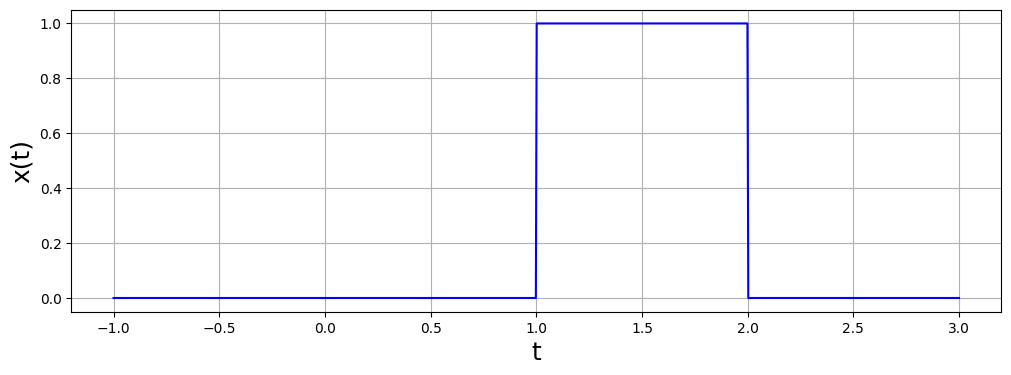

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
def f(t):
    return (abs(t-1.5) < .5).astype(float)

t = np.linspace(-1, 3, 1000)
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)

plt.plot(t, f(t),'b')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
plt.show()

Sustituyendo esta $x(t)$ en
$$ X(f) = \int_{-\infty}^{\infty}x( t)e^{-i2\pi  f t}dt 
$$
obtenemos [$\int_{}^{}e^{a t}dt = \frac{1}{a}e^{a t}$]

$$ 
X(f) = \int_{-.5}^{.5}e^{-i2\pi f t}dt = \frac{e^{-i \pi f}-e^{i\pi f}}{-2\pi i f}
$$
Usando la Fórmula de Euler $[e^{i\theta} = cos(\theta) +isen(\theta)]$

Obtenemos $$X(f)=\frac{sen(\pi f)}{\pi f} $$

esta función se conoce como $senc(t)$ o seno cardinal y su gráfico es:




In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
f1 = np.linspace(-5, .001, 1000)
f2 = np.linspace(.001,5, 1000)
f =np.concatenate((f1, f2), axis=None)
ReX = np.sin(np.pi  * f)/(np.pi  * f)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)

plt.plot(f, ReX,'b',label='Re{X(f)}')
plt.plot(f, 0*f,'--g',label='Im{X(f)}')

ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
ax.legend()
plt.title(r'$\mathscr{F}[rect(t)] = sinc(\pi f) = \frac{sin(\pi f)}{\pi f}$', fontsize=18)

plt.grid()
plt.show()


Ahora vamos a sacar la transformada inversa de Fourier de esta función. 

Sustituyendo
 $$ 
 X(f) = \frac{e^{-i \pi f}-e^{i\pi f}}{-2\pi i f}
 $$
en

$$ 
x(t) = \int_{-\infty}^{\infty}X( f)e^{i2\pi  f t}df 
$$

obtenemos 
$$ 
x(t) = \frac{1}{-i2\pi}\int_{-\infty}^{\infty}\frac{e^{-i \pi f}-e^{i\pi f}}{f}e^{i2\pi f t}df 
$$

o sea

$$ 
x(t) = \frac{1}{-i2\pi}\int_{-\infty}^{\infty}\frac{e^{i 2\pi f(t-.5)}-e^{i2\pi f(t+.5)}}{f}df 
$$
Para calcular esta integral podemos usar la fórmula integral de Cauchy que se estudia en Variable Compleja (ver por ejemplo el libro $\color{green}{\text{Complex Variables and Applications, Eighth Edition de Ruel V. Churchill, McGraw-Hill}}$

Esta fórmula dice que si $X(f)$ es analítica dentro y sobre un contorno cerrado $C$ entonces la integral de contorno sobre $C$ para cualquier punto  $f_0$ dentro de $C$ es
$$
\oint\limits_{C}\frac{X(f)}{f − f_0}df  = 2πi X(f_0)
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(121)

theta = np.linspace(0, np.pi, 100)
x = np.linspace(-1, 1, 100)
r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
x3 = [.0 for i in x]

ax.plot(x1, x2)
ax.plot(x, 0*x,'-b')
ax.plot([0], [.1],'.b')
plt.arrow(0,0 , 0.01, 0, shape='full', lw=0, length_includes_head=True, head_width=.1)
plt.arrow(0,1 , -0.01, 0, shape='full', lw=0, length_includes_head=True, head_width=.1)
plt.text(.1,.1,r'i $\epsilon$')

ax.set_aspect(1)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')
plt.title(r'$t \geq 0$', fontsize=16)
ax = fig.add_subplot(122)

theta = np.linspace(np.pi, 2*np.pi, 100)
x = np.linspace(-1, 1, 100)
r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
x3 = [.0 for i in x]

ax.plot(x1, x2)
ax.plot([0], [.1],'.b')
ax.plot(x, 0*x,'-b')
plt.arrow(0,0 , 0.01, 0, shape='full', lw=0, length_includes_head=True, head_width=.1)
plt.arrow(0,-1 , -0.01, 0, shape='full', lw=0, length_includes_head=True, head_width=.1)
plt.text(.1,.1,r'i $\epsilon$')
ax.set_aspect(1)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')
plt.title('t<0', fontsize=16)

plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')

plt.show()



Tomando a $C$ como el semicirculo superior y la línea de $-\infty$ a $\infty$ y 
$$
X(f) = e^{i2 \pi ft}
$$

La integral a lo largo del semicírculo la obtenemos haciendo 
$f = |f|e^{i\theta}= |f|[(cos(\theta) + i sen(\theta)] $ donde R es el radio constante del semicírculo


$$
i\int_{0}^{\pi}\frac{e^{i 2\pi |f|e^{i\theta} t}e^{i\theta}}{e^{i\theta}}d\theta
$$

esta integral es un caso particular del lema de Jordan y se puede demostrar que se anula en el límite cuando el radio tiende a infinito.

vemos que 


$$
 \lim_{\epsilon\to 0}\int_{-\infty}^{\infty}\frac{e^{i 2\pi ft}}{f-i\epsilon}df = 2\pi i \Theta(t)= \begin{cases}
    2\pi i , & \text{si $t\geq0$}\\
    0, & \text{si $t<0$}
  \end{cases} 
$$
Sustituyendo en
$$ 
x(t) = \frac{1}{-i2\pi}\int_{-\infty}^{\infty}\frac{e^{i 2\pi f(t-.5)}-e^{i2\pi f(t+.5)}}{f}df 
$$

obtenemos

$$
x(t) = \Theta(t+.5) -\Theta(t - .5)
$$ 

Donde $\Theta(t-t_0)$ es la función escalón en $t_0$. 

O sea que obtenemos la función rectangular con bordes en -.5 y .5



**texto en negrita**<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.10 Cálculo numérico de la transformada de Fourier}}$
<hr style="border:2px solid gray"> </hr>

También podemos evaluar numéricamente la transformada de Fourier y la transformada inversa tal como lo hicimos en la introducción.

El método más simple es aproximar el área bajo una curva con la suma de las áreas de rectángulos como se ilustra a continuación. 

A esta aproximación se le conoce el método de los rectángulos.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def g(t):
    return np.sqrt(1-t*t)
t0=1
t = np.linspace(-1, 1, 1000)
N = 100
dt = 2/N
n = np.arange(N)
A = .5*np.pi
fig=plt.figure(figsize=(12,6), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, g(t))  
plt.bar(n*dt-t0, g(n*dt-t0), width=dt, color='cyan')
text = ("Número de puntos: %d\n" % N +
        "Valor exacto: %.4f\n" % A +
        "Valor aproximado: %.4f" % (dt * sum(g(n*dt-t0))))
plt.text(-0.0, 0.2, text, ha='center',bbox=dict(facecolor='white'))
plt.grid()
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-2,2,1000)
f = np.linspace(-10,10,1000)

def x(t):
    return (abs(t) < .5).astype(float)

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()


Lo que comentamos antes del Principio de Incertidumbre en Mecánica Cuántica se ilustra variando la anchura temporal de la función rectangular y notando el cambio en la anchura su transformada de Fourier.

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.11 Cálculo numérico de la transformada inversa de Fourier}}$
<hr style="border:2px solid gray"> </hr>


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

t = np.linspace(-2,2,3000)
f = np.linspace(-20,20,3000)

def X(f):
    Y = np.sin(np.pi*f)/(np.pi*f) 
    return Y
def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X(f),np.exp(2*np.pi*1.j*f*t1))
    return Y*df

fig = go.Figure(data=[go.Scatter(x=f, y=X(f))])
fig.update_layout(title={'text': "X(f)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="f",
    yaxis_title="X(f)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=t, y=np.real(Fourier_Inversa(X,t,f)), name="Real x(t)")])
fig.add_scatter(x=t, y=np.imag(Fourier_Inversa(X,t,f)),mode='lines', name="Imaginaria x(t)",line=dict(color='green', width=2,dash='dash'))
fig.update_layout(title={'text': "Transformada Inversa de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="t",
    yaxis_title="x(t)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

Veamos otro ejemplo con $x(t)$ similar a la anterior pero desplazada hacia la derecha:

$$
x(t) = \begin{cases}
    0 , & \text{si $|t-\frac{1}{2}|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|t-\frac{1}{2}|=\frac{1}{2}$}\\
    1, & \text{si $|t-\frac{1}{2}|<\frac{1}{2}$}
  \end{cases} 
$$

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
def x(t):
    return (abs(t-.5) < 0.5).astype(float)
t = np.linspace(-2, 2, 300)
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t),'b')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
plt.show()

Sustituyendo esta $x(t)$ en
$$ X(f) = \int_{-\infty}^{\infty}x( t)e^{-i2\pi f t}dt 
$$

usando que

$$
\int_{}^{}e^{a t}dt = \frac{1}{a}e^{a t}
$$

obtenemos

$$ 
X(f) = \int_{0}^{1}e^{-i2\pi f t}dt = \frac{e^{-i2\pi f}-1}{-i2\pi f}
$$

Si factorizamos $$e^{-i\pi f}$$ obtenemos 

$$ 
X(f) =  e^{-i\pi f}\left( \frac{e^{-i \pi f}-e^{i\pi f}}{-2\pi i f} \right)$$ 

que es el mismo valor del caso anterior pero multiplicada por 

$$e^{-i2\pi f (.5)}$$

Más adelante veremos que esta es una propiedad general de desplazamiento de la transformada de Fourier.

Usando la Fórmula de Euler

$$
e^{i\theta} = cos(\theta) +isen(\theta)
$$

Obtenemos 

$$
X(f)=\frac{sen(2\pi f)}{2\pi f}+ i\frac{cos(2\pi f)-1}{2\pi f}
$$

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
f=1

f1 = np.linspace(-5, -.001, 200)
f2 = np.linspace( .001, 5,100)
f =np.concatenate((f1,f2), axis=None)
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)

plt.plot(f, np.sin(2*np.pi*f)/(2*np.pi*f),'b',label='Re{X(f)}')
plt.plot(f, (np.cos(2*np.pi*f)-1)/(2*np.pi*f),'--g',label='Im{X(f)}')

ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.grid()
plt.legend()
plt.title('Transformada de Fourier', fontsize=18)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def X(f):
    Y = np.sin(2*np.pi*f)/(2*np.pi*f) +1j*(np.cos(2*np.pi*f)-1)/(2*np.pi*f) 
    return Y
def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X(f),np.exp(2*np.pi*1.j*f*t1))
    return Y*df
t = np.linspace(-2,2,5000)
f = np.linspace(-20,20,5000)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(f, np.real(X(f)),'-b',label='Parte Real')
plt.plot(f, np.imag(X(f)),'--g',label='Parte Imaginaria')
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('X(f)', fontsize=18)
plt.grid()
plt.legend()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, np.real(Fourier_Inversa(X,t,f)),'-b',label='Parte Real')
ax.plot(t, np.imag(Fourier_Inversa(X,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada Inversa de Fourier Numérica', fontsize=18)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.1.12 Cálculo simbólico de la transformada de Fourier}}$
<hr style="border:2px solid gray"> </hr>

Otra posibilidad es usar cálculo simbólico para obtener la transformada  de Fourier y su transformada inversa, como se ilustra a continuación:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
x,k = symbols('x k')
impulso = Heaviside (x+.5) - Heaviside(x-.5)
fourier_impulso = fourier_transform(impulso, x, k)
#sinc = sin(pi*k)/(pi*k)
inversa = inverse_fourier_transform(fourier_impulso, k, x)
plot(impulso, (x, -5, 5),line_color='blue');
plot(fourier_impulso, (k, -5, 5),line_color='blue');
plot(inversa, (x, -5, 5),line_color='blue');
y1 = lambdify(x, inversa, modules='numpy')
x1=np.linspace(-2,2,1000)
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(x1, y1(x1),'-b')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
plt.title('Transformada Inversa de Fourier usando cálculo simbólico', fontsize=18)
plt.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.2.1 Propiedades. Linealidad}}$

<hr style="border:2px solid gray"> </hr>

Si la transformada de Fourier de $x_1(t)$ es $X_1(f)$ y la transformada de Fourier de $x_2(t)$ es $X_2(f)$ entonces la transformada de Fourier de 
$a_1x_1(t)$ + $a_2x_2(t)$ es
$$
\int_{-\infty}^{\infty}\big[a_1x_1(t) + a_2x_2(t)\big] e^{-i2\pi  f t}dt =a_1X_1(f) + a_2X_2(f)
$$


<hr style="border:2px solid gray"> </hr>

##  $\color{blue}{\text{1.2.2 Propiedades. Desplazamiento en el tiempo}}$
<hr style="border:2px solid gray"> </hr>


Si la transformada de Fourier de $x(t)$ es $X(f)$ entonces al desplazar el origen del tiempo hacia la derecha en $t_0$ unidades encontramos que la transformada de Fourier de $x(t-t_0)$ es
$$
\int_{-\infty}^{\infty}x(t-t_0) e^{-i2\pi  f t}dt 
$$
haciendo el cambio de variable $t_1=t-t_0$ vemos que 
$$
\int_{-\infty}^{\infty}x(t-t_0) e^{-i2\pi  f t}dt = e^{-i2\pi  f t_0}\int_{-\infty}^{\infty}x(t_1) e^{-i2\pi  f t_1}dt_1=e^{-i2\pi  f t_0}X(f)
$$
Por lo tanto la nueva transformada de Fourier se obtiene multiplicando la inicial por $e^{-i2\pi  f t_0}$

$$
\mathscr{F}[x(t-t_0)] = e^{-i2\pi  f t_0}\mathscr{F}[x(t)] 
$$




<hr style="border:2px solid gray"> </hr>

##  $\color{blue}{\text{1.2.3 Propiedades. Desplazamiento en la frecuencia}}$
<hr style="border:2px solid gray"> </hr>


Si desplazamos la frecuencia de la transformada de Fourier $X(f)$ en $f_0$ unidades en la frecuencia obtenemos

$$
\mathscr{F}^{-1}[X(f-f_0)] = \int_{-\infty}^{\infty}X(f-f_0)e^{i2\pi  f t}df 
$$

haciendo el cambio de variable $f_1= f-f_0$ obtenemos
$$
\mathscr{F}^{-1}[X(f-f_0)] = \int_{-\infty}^{\infty}X(f_1)e^{i2\pi  (f_1+f_0) t}df = e^{i2\pi  f_0t}\int_{-\infty}^{\infty}X(f_1)e^{i2\pi f_1 t}df_1 
$$
es decir 
$$
\mathscr{F}^{-1}[X(f-f_0)] = e^{i2\pi f_0 t}x(t)
$$
o
$$
\mathscr{F}[e^{i2\pi f_0 t}x(t)] = X(f-f_0)
$$





<hr style="border:2px solid gray"> </hr>

##  $\color{blue}{\text{1.2.4 Propiedades. Escalamiento}}$
<hr style="border:2px solid gray"> </hr>

Si la transformada de Fourier de $x(t)$ es $X(f)$ entonces al escalar el  tiempo $at$ encontramos que la transformada de Fourier de $x(at)$ es

$$
\int_{-\infty}^{\infty}x(at) e^{-i2\pi  f t}dt 
$$

haciendo el cambio de variable $t_1=at$ vemos que si $a>0$

$$
\int_{-\infty}^{\infty}x(at) e^{-i2\pi  f t}dt =\frac{1}{a}\int_{-\infty}^{\infty}x(t_1) e^{\frac{-i2\pi  f t_1}{a}}dt_1=\frac{1}{a}X(\frac{f}{a})
$$

y si $a<0$

$$
\int_{-\infty}^{\infty}x(at) e^{-i2\pi  f t}dt =\frac{1}{a}\int_{\infty}^{-\infty}x(t_1) e^{\frac{-i2\pi  f t_1}{a}}dt_1=-\frac{1}{a}X(\frac{f}{a})
$$
Por lo tanto la nueva transformada de Fourier se obtiene evaluando la original en $\frac{f}{a}$ y multiplicandola por $\frac{1}{|a|}$

$$
\mathscr{F}[x(at)] = \frac{1}{|a|}X(\frac{f}{a})
$$

Como caso particular, la inversión del tiempo resulta cuando $a=-1$

$$
\mathscr{F}[x(-t)] = X(-f)
$$

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.2.5 Propiedades. Simetría}}$
<hr style="border:2px solid gray"> </hr>

Si 𝑥(𝑡)  una función par, es decir $x(-t) = x(t)$ entonces usando la Fórmula de Euler

$$
e^{i\theta} = cos(\theta) +isen(\theta)
$$ 

vemos que
$$
X(f)=\int_{-\infty}^{\infty}x(t) e^{-i2\pi  f t}dt  =\int_{-\infty}^{\infty}x(t) cos(2\pi  f t)dt - i\int_{-\infty}^{\infty}x(t) sen(2\pi ft)dt
$$
puesto que la función $sen(2\pi ft)$ es impar, la segunda integral se anula y por lo tanto la transformada de Fourier es real
$$
X(f)=\int_{-\infty}^{\infty}x(t) e^{-i2\pi  f t}dt  =\int_{-\infty}^{\infty}x(t) cos(2\pi  f t)dt
$$

Igualmente si 𝑥(𝑡)  es una función impar, es decir $x(-t) = -x(t)$ entonces  la primera integral en 
$$
X(f)=\int_{-\infty}^{\infty}x(t) cos(2\pi  f t)dt - i\int_{-\infty}^{\infty}x(t) sen(2\pi ft)dt
$$
se anula y por lo tanto la transformada de Fourier es imaginaria
$$
X(f)=\int_{-\infty}^{\infty}x(t) e^{-i2\pi  f t}dt  =-i\int_{-\infty}^{\infty}x(t) sen(2\pi  f t)dt
$$




<hr style="border:2px solid gray"> </hr>

##  $\color{blue}{\text{1.2.6 Propiedades. Dualidad}}$
<hr style="border:2px solid gray"> </hr>

Esta propiedad es un reflejo de las similitudes que existen entre la transformada de Fourier y su inversa. Se describe por la fórmula siguiente:

Si 
$$
\mathscr{F}[x (t)]=X(f) 
$$

entonces 

$$
\mathscr{F}[X(t)]= x(−f)
$$

Para demostrarla partimos de

$$ 
x(t) = \int_{-\infty}^{\infty}X( f)e^{i2\pi  f t}df
$$


a la variable de integración $f$ que es muda le podemos llamar $f_1$



$$ 
x(t) = \int_{-\infty}^{\infty}X(f_1)e^{i2\pi  f_1 t}df_1 
$$

evaluamos en $t=-f$


$$ 
x(-f) = \int_{-\infty}^{\infty}X(f_1)e^{-i2\pi  f_1 f}df_1 
$$

finalmente renombramos a la variable muda de integración $f_1 = t$

$$ 
x(-f) = \int_{-\infty}^{\infty}X(t)e^{-i2\pi  t f}dt 
$$

y como sabemos que para cualquier función $g(t)$ 

$$
\mathscr{F}[g (t)] = \int_{-\infty}^{\infty}g(t)e^{-i2\pi  f t}dt
$$

Hemos demostrado que


$$
\mathscr{F}[X(t)]= x(−f)
$$

Por ejemplo como vimos antes la transformada de Fourier de la función rectangular dada por
$$
rect(t) = \begin{cases}
    0 , & \text{si $|t|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|t|=\frac{1}{2}$}\\
    1, & \text{si $|t|<\frac{1}{2}$}
  \end{cases} 
$$

es
$$
X(f)=\frac{sen(\pi f)}{\pi f} 
$$

entonces por dualidad inferimos que la transformada de Fourier de 

$$
X(t)=\frac{sen(\pi t)}{\pi t} 
$$

es

$$
rect(-f) =rect(f) = \begin{cases}
    0 , & \text{si $|f|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|f|=\frac{1}{2}$}\\
    1, & \text{si $|f|<\frac{1}{2}$}
  \end{cases} 
$$

como se ilustra a continuación


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-10,10,1000)
f = np.linspace(-3,3,1000)

def x(t):
    return np.sin(np.pi*t)/(np.pi*t)

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

<hr style="border:2px solid gray"> </hr>

##  $\color{blue}{\text{1.2.7 Propiedades. Derivación respecto al tiempo}}$
<hr style="border:2px solid gray"> </hr>


De la definición de la transformada de Fourier de la derivada de $x(t)$ 

$$
\mathscr{F}[\frac{dx(t)}{dt}] = \int_{-\infty}^{\infty}\frac{dx(t)}{dt} e^{-i2\pi  f t}dt
$$

Integramos por partes para obtener

$$
\mathscr{F}[\frac{dx(t)}{dt}] =\int_{-\infty}^{\infty}\frac{d[x(t)e^{-i2\pi  f t}]}{dt} dt -\int_{-\infty}^{\infty}x(t)\frac{d[e^{-i2\pi  f t}]}{dt}dt
$$

el primer témino se anula por anularse $x(t)$ en los dos extremos

por lo tanto obtenemos el resultado

$$
\mathscr{F}[\frac{dx(t)}{dt}] =i2\pi  f \int_{-\infty}^{\infty}x(t)e^{-i2\pi  f t}dt = i2\pi f\mathscr{F}[x(t)]
$$

Repitiendo este procedimiento n veces que 
$$
\mathscr{F}[\frac{d^nx(t)}{dt^n}] = (2\pi if)^n\mathscr{F}[x(t)]
$$
que es equivalente a 
$$
\frac{d^nx(t)}{dt^n} = \mathscr{F}^{-1} [(2\pi if)^nX(f)]  
$$






<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.2.8 Propiedades. Derivación respecto a la frecuencia}}$
<hr style="border:2px solid gray"> </hr>


De la definición de la transformada inversa de Fourier de la derivada de $X(f)$ 

$$
\mathscr{F}^{-1}[\frac{dX(f)}{df}] = \int_{-\infty}^{\infty}\frac{dX(f)}{df} e^{i2\pi  f t}df
$$

Integramos por partes para obtener

$$
\mathscr{F}^{-1}[\frac{dX(f)}{df}] =\int_{-\infty}^{\infty}\frac{d[X(f)e^{i2\pi  f t}]}{df} df -\int_{-\infty}^{\infty}X(f)\frac{d[e^{i2\pi  f t}]}{df}df
$$

el primer témino se anula por anularse $x(t)$ en los dos extremos

por lo tanto obtenemos el resultado

$$
\mathscr{F}^{-1}[\frac{dX(f)}{df}] =-i2\pi  f \int_{-\infty}^{\infty}X(f)e^{i2\pi  f t}df = -i2\pi t x(t)]
$$

Repitiendo este procedimiento n veces vemos que 
$$
\mathscr{F}^{-1}[\frac{d^nX(f)}{df^n}] = (-2\pi it)^n x(t)]
$$
que es equivalente a 
$$
\frac{d^nX(f)}{df^n} = \mathscr{F}[(-2\pi it)^nx(t)]
$$


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.2.9 Aplicaciones en ecuaciones diferenciales ordinarias}}$
<hr style="border:2px solid gray"> </hr>

La transformada de Fourier es muy útil para resolver ecuaciones diferenciales ordinarias. 

A modo de ejemplos de aplicación de la transformada de Fourier vamos a resolver una ecuación diferencial ordinaria.

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://carlosvalero.com/wp-content/uploads/2021/05/geogebra-export.png",width=500, height=300)



Ejemplo 1. Consideremos una masa en un extremo de un resorte sujeta a una fuerza de Hook dada por -$kx^2$ con fricción proporcional a $ -\gamma \frac{dx}{dt}$. 

La ecuación de movimiento es

$$
m\frac{d^2x}{dt^2} + \gamma \frac{dx}{dt} + kx = F_{ext}(t)
$$

Tomando la transformada de Fourier obtenemos

$$
(2\pi i f)^2 \mathscr{F}[x(t)] + \gamma (2\pi i f)\mathscr{F}[x(t)] +k\mathscr{F}[x(t)] = \mathscr{F}[F_{ext}(t)]
$$

o sea

$$
\mathscr{F}[x(t)] = \frac{\mathscr{F}[F_{ext}(t)]}{(2\pi i f)^2 + \gamma (2\pi i f) +k}
$$

tomando la transformada inversa de Fourier a ambos lados de la igualdad obtenemos la solución buscada

$$
x(t)= \mathscr{F}^{-1}\big[\frac{\mathscr{F}[F_{ext}(t)]}{(2\pi i f)^2 + \gamma (2\pi i f) +k}\big]
$$

como se ilustra a continuación:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 1
k = 100
f0=np.round(np.sqrt(k/m)/2/np.pi,2)
gamma = 1
F = 10
def F_ext(t):
  return (abs(t-1) < 1).astype(float)*np.cos(2*np.pi*1.6*t)
def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype=complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      S=np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
      Y[i]=S
    return Y*dt
def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype=complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      S=np.dot(X,np.exp(2*np.pi*1.j*f*t1))
      Y[i]=S
    return Y*df

t = np.linspace(-1,4,500)
f = np.linspace(-20,20,500)


A = np.zeros(len(f), dtype=complex)
for i, f1 in enumerate(f):
  A[i] = Fourier(F_ext,t,f)[i]/((2*np.pi*1.j*f1)**2+gamma*2*np.pi*1j*f1+k)

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, F_ext(t))
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$F_{ext}(t)$', fontsize=18)
plt.title(r'Frecuencia Natural = $\frac{1}{2\pi}\sqrt {\frac{k}{m}}$'+'= {}'.format(f0)+' Hz', fontsize=18)
plt.grid()
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(Fourier(F_ext,t,f)),'-b',label='Parte Real')
ax.plot(f, np.imag(Fourier(F_ext,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada de Fourier Numérica de '+r'$ F_{ext}$', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel(r'$\mathscr{F}[F_{ext}(t)]$', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(A),'-b',label='Parte Real')
ax.plot(f, np.imag(A),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title(r'$\mathscr{F}[x(t)] = \frac{\mathscr{F}[F_{ext}(t)]}{(2\pi i f)^2 + \gamma (2\pi i f) +k}$', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel(r'$\frac{\mathscr{F}[F_{ext}(t)]}{(2\pi i f)^2 + \gamma (2\pi i f) +k}$', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, np.real(Fourier_Inversa(A,t,f)),'-b',label='Parte Real')
ax.plot(t, np.imag(Fourier_Inversa(A,t,f)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada Inversa de Fourier  Numérica', fontsize=18)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.show()

Un ejemplo de un desastre que se pudo haber evitado con un poco de análisis de Fourier para evitar resonancias entre las frecuencias naturales de vibración del puente y las frecuencias de oscilación del viento es el Puente Tacoma en el estado de Washington en EU.


Estas mismas ideas se aplican para entender cómo oscilan los edificios durante los sismos.


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.2.10 Aplicaciones en ecuaciones diferenciales parciales}}$
<hr style="border:2px solid gray"> </hr>

La transformada de Fourier es muy útil para resolver ecuaciones diferenciales ordinarias. 

A modo de ejemplo vamos a resolver una ecuación diferencial parcial.

Ecuación de difusión del calor en 1D.

$$
\frac{\partial T(x,t)}{\partial t} = \alpha\frac{\partial ^2T(x,t)}{\partial x^2}
$$

donde $T(x,t)$ es la temperatura en $x$ al tiempo $t$ y. $\alpha$ es la difusividad térmica del material.

Tomamos la transformada de Fourier respecto a x 

$$
\mathscr{F}[T(x,t)] = \int_{-\infty}^{\infty}T(x,t) e^{-i2\pi  k x}dx
$$ 

Nóten que $\mathscr{F}[T(x,t)]$ depende de $k$ y de $t$.

Usando la propiedad de derivada que hemos visto obtenemos

$$
\frac{\partial \mathscr{F}[T(x,t)]}{\partial t} = \alpha (2\pi ik)^2 \mathscr{F}[T(x,t)] =-4 \pi^2 \alpha k^2 \mathscr{F}[T(x,t)]
$$

Integrando en el tiempo y usando la condición inicial vemos que

$$
\mathscr{F}[T(x,t)] = e^{-4 \pi^2 \alpha k^2 t} \mathscr{F}[T(x,0)] =e^{-4 \pi^2 \alpha k^2 t} \mathscr{F}[T_0(x)]
$$

Si conocemos $T_0(x)$ entonces la solución se obtiene al tomar la transformada inversa de Fourier 


$$
T(x,t) = \mathscr{F}^{-1}\mathscr{F}[T(x,t)] = \mathscr{F}^{-1}[e^{-4 \pi^2 \alpha k^2 t} \mathscr{F}[T(x,0)]] = \mathscr{F}^{-1}[e^{-4 \pi^2 \alpha k^2 t} \mathscr{F}[T_0(x)]]
$$

Vamos a ilustrar este procedimiento con un ejemplo 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
alfa = 1
t  = 2
def T_0(x):
  #return (abs(x) < .5).astype(float)*np.cos(3*x)
  return (abs(x) < .5).astype(float)


def Fourier(fun,x,k):
    Y = np.zeros(len(k), dtype=complex)
    dx=(x[-1]-x[0])/len(x)
    for i, k1 in enumerate(k):
      S=np.dot(fun(x),np.exp(-2*np.pi*1.j*k1*x))
      Y[i]=S
    return Y*dx

def Fourier_Inversa(X,x,k):
    Y = np.zeros(len(x), dtype=complex)
    dk =(k[-1]-k[0])/len(k)
    for i, x1 in enumerate(x):
      S=np.dot(X,np.exp(2*np.pi*1.j*k*x1))
      Y[i]=S
    return Y*dk

x = np.linspace(-5,5,500)
k = np.linspace(-5,5,500)


A = np.zeros(len(k), dtype=complex)
for i, k1 in enumerate(k):
  A[i] = Fourier(T_0,x,k)[i]*np.exp(-4*np.pi**2*alfa*k1**2*t)


fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(x, T_0(x))
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel(r'$T_0(x)$', fontsize=18)
plt.title(r'$T_0(x)$', fontsize=18)
plt.grid()
plt.show()


fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(k, np.real(Fourier(T_0,x,k)),'-b',label='Parte Real')
ax.plot(k, np.imag(Fourier(T_0,x,k)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title(r'Transformada de Fourier Numérica de $T_0$', fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel(r'$\mathscr{F}[T_{0}(x)]$', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(k, np.real(A),'-b',label='Parte Real')
ax.plot(k, np.imag(A),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title(r'$\mathscr{F}[T(x,t)] =e^{-4 \pi^2 \alpha k^2 t} \mathscr{F}[T_0(x)]$'+' para t={}'.format(t), fontsize=18)
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel(r'$\mathscr{F}[T(x,t)]$', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(x, np.real(Fourier_Inversa(A,x,k)),'-b',label='Parte Real')
ax.plot(x, np.imag(Fourier_Inversa(A,x,k)),'--g',label='Parte Imaginaria')
plt.grid()
plt.legend()
plt.title('Transformada Inversa de Fourier  Numérica para t={}'.format(t), fontsize=18)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel(r'$T(x,t)$', fontsize=18)
plt.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.3 La Serie de Fourier como un caso particular de la Transformada de Fourier}}$
<hr style="border:2px solid gray"> </hr>

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.3.1 Repaso de series de Fourier}}$
<hr style="border:2px solid gray"> </hr>



Al igual que en análisis vectorial se puede escribir un vector arbitrario como una combinación lineal de vectores  base 
$$(\hat{i},\hat{j},\hat{k})$$ 
como

$$\vec{V} = a_i\hat{i}+a_j\hat{j}+a_k\hat{k}$$

una función $x_p(t)$ periodica de periodo T se puede aproximar como una combinación lineal 

$$
x_p(t) = \sum_{n=-\infty}^{\infty}C_ne^{\frac{i2\pi n  t}{T}}
$$
de un conjunto infinito de funciones base en un espacio de Hilbert dadas por

$$
f_n(t)= e^{\frac{i2\pi n  t}{T}}
$$

para todos los valores n enteros.

La propiedad de ortogonalidad de las funciones base se refleja en que 

$$
\big<f_m(t),f_n(t)\big>=\int_{0}^{T}f_m(t)\overline{f_n(t)}dt=\int_{0}^{T}e^{\frac{i2\pi m  t}{T}}e^{\frac{-i2\pi n  t}{T}}dt = T\delta_{mn}
$$
Los coeficientes $C_m$ son en general complejos y se pueden calcular mediante el producto interno de $x_p(t)$ con cada una de las funciones base 
$$
\big<x(t),f_m(t)\big>=\int_{0}^{T}x_p(t)e^{\frac{-i2\pi m  t}{T}}dt =\sum_{n=-\infty}^{\infty}TC_n\delta_{mn}=TC_m
$$

por lo tanto nos queda

$$
C_m = \frac{1}{T}\int_{0}^{T}x_p(t)e^{\frac{-i2\pi m  t}{T}}dt 
$$

o en forma equivalente

$$
C_m = \frac{1}{T}\int_{-T/2}^{T/2}x_p(t)e^{\frac{-i2\pi m  t}{T}}dt 
$$


Veamos un ejemplo



In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

t = np.linspace(-10,10,1000)
def x(t):
  Y = np.zeros(len(t))
  for i, t1 in enumerate(t):
    while abs(t1)>T or t1<0:
      if t1>0:t1=t1-T
      if t1<0:t1=t1+T
    #Y[i]= (abs(t1-.5) < .5).astype(float)*np.cos(2*np.pi*1*t1)
    Y[i]= (abs(t1-.5) < .5).astype(float)
  return Y  
T,N = 7,100
def Prod_Interno(n,T):
    S=0
    t1=np.linspace(0,T,500)
    dt=(t1[-1]-t1[0])/len(t1)
    S = np.dot(x(t1),np.exp(-2*np.pi*1.j*n/T*t1))
    return S*dt/T
y_aprox = np.zeros(len(t))
for n in np.arange(-N,N+1,1):
  y_aprox += np.real(Prod_Interno(n,T)*np.exp(2*np.pi*1.j*n*t/T))
fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Función exacta")])
fig.add_scatter(x=t, y=y_aprox,mode='lines', name="Approximación en SF")
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

Veamos una animación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
T = 7
def x(t):
  Y = np.zeros(len(t))
  for i, t1 in enumerate(t):
    while abs(t1)>T or t1<0:
      if t1>0:t1=t1-T
      if t1<0:t1=t1+T
    #Y[i]= (abs(t1-.5) < .5).astype(float)*np.cos(2*np.pi*1*t1)
    Y[i]= (abs(t1-.5) < .5).astype(float)*t1
  return Y  
def Prod_Interno(n,T):
    S=0
    t1=np.linspace(0,T,500)
    dt=(t1[-1]-t1[0])/len(t1)
    S = np.dot(x(t1),np.exp(-2*np.pi*1.j*n/T*t1))
    return S*dt/T
def Grafica(N):
  t = np.linspace(-10,10,1000)
  y_aprox = np.zeros(len(t))
  for n in np.arange(-N,N+1,1):
    y_aprox += np.real(Prod_Interno(n,T)*np.exp(2*np.pi*1.j*n*t/T))
  ax.clear() 
  ax.plot(t, x(t), 'b-', label='Función',lw=2)
  ax.plot(t, y_aprox, 'r-', label='Aproximación en SF', lw=2)
    
  ax.set_xlabel('Time (s)', fontsize=18)
  ax.set_ylabel('x(t)', fontsize=18)
  ax.grid()
  ax.legend()
  ax.set_xlim(( -10,10)) 
  ax.set_ylim((-1,1.5)) 
  
  ax.set_title('N = {}'.format(N), fontsize=18)


fig=plt.figure(figsize=(10,5), dpi= 100)
ax = fig.add_subplot(111)
anim = animation.FuncAnimation(fig, Grafica, frames= 40, interval=800)
plt.close()
HTML(anim.to_html5_video())

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.3.2 Relación entre SF y TF}}$
<hr style="border:2px solid gray"> </hr>


Si la función periodica $x_p(t)$ consiste de un tren infinito de funciones no periodicas $x(t)$ que se repiten cada tiempo T entonces podemos escribir

$$
C_m = \frac{1}{T}\int_{-T/2}^{T/2}x(t)e^{\frac{-i2\pi m  t}{T}}dt = \frac{1}{T}\int_{-\infty}^{-\infty}x(t)e^{\frac{-i2\pi m  t}{T}}dt
$$

es decir que los coeficientes $C_m$ de la serie de Fourier vienen dados por la transformada de Fourier evaluada en las frecuencias $f=\frac{m}{T} = mf_0$ con $f_0=\frac{1}{T}$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10,10,1000)
f = np.linspace(-10,10,1000)
T = 2.5
def x(t):
    return (abs(t) < .5).astype(float)
def x_p(t):
  Y = np.zeros(len(t))
  for i, t1 in enumerate(t):
    while abs(t1)>T/2 or t1<-T/2:
      if t1>T/2:t1=t1-T
      if t1<-T/2:t1=t1+T
    Y[i]= x(t1)
  return Y 
def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, x(t),'-b')
plt.grid()
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$x(t)$', fontsize=18)
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, x_p(t),'-b')
plt.grid()
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$x_p(t)$', fontsize=18)
plt.show()

f0 = np.arange(-10,10,1/T)

y_aprox_real = np.zeros(len(t))
for i, f1 in enumerate(f0):
  y_aprox_real += np.real(Fourier(x,t,f0)[i]*np.exp(2*np.pi*1.j*f1*t))/T


fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(f, np.real(Fourier(x,t,f)),'-b',label='Parte Real')
ax.plot(f, np.imag(Fourier(x,t,f)),'--r',label='Parte Imaginaria')
ax.plot(f0, np.real(Fourier(x,t,f0)),'.b',label=r'$C_m$ Parte Real')
ax.plot(f0, np.imag(Fourier(x,t,f0)),'.r',label=r'$C_m$ Parte Imaginaria')
plt.grid()
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel(r'$\mathscr{F}[x(t)]$', fontsize=18)
plt.legend()
plt.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(t, y_aprox_real,'-b',label='Aprox en SF')
plt.grid()
plt.legend()
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel(r'$x_p(t)$', fontsize=18)
plt.show()


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4 Transformada de Fourier de funciones especiales}}$
<hr style="border:2px solid gray"> </hr>


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4.1 TF de la delta de Dirac}}$
<hr style="border:2px solid gray"> </hr>


Una representación integral de la delta de Dirac $\delta(t-t_0)$

es la siguiente:

$$
\delta(t-t_0)= \int_{-\infty}^{\infty}e^{i2\pi  f (t-t_0)}df
$$

Dado que la delta de Dirac tiene la propiedad siguiente

$$
\int_{-\infty}^{\infty}x( t)\delta(t-t_0)dt = x(t_0)
$$

podemos usar la definición de la TF para obtener

$$ 
\mathscr{F}[\delta(t-t_0)] = \int_{-\infty}^{\infty}\delta(t-t_0)e^{-i2\pi  f t}dt = e^{-i2\pi  f t_0}
$$


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4.2 TF de la función seno}}$
<hr style="border:2px solid gray"> </hr>

Igualmente usamos la definición para  calcular la transformada de Fourier de la función seno


$$
x(t) = sen (2\pi  f_0 t)
$$

Por la fórmula de Euler obtenemos

$$
e^{i\theta} - e^{-i\theta} = 2isen(\theta)
$$

sustituyendo en la fórmula de la transformada de Fourier

obtenemos

$$ 
X(f) = \frac{1}{2i}\int_{-\infty}^{\infty}e^{-i2\pi  (f-f_0) t}dt-\frac{1}{2i}\int_{-\infty}^{\infty}e^{-i2\pi  (f+f_0) t}dt
$$

Recordando que 

$$
\delta(f-f_0)= \int_{-\infty}^{\infty}e^{i2\pi  t (f-f_0)}dt=\int_{-\infty}^{\infty}e^{-i2\pi  t (f-f_0)}dt
$$


obtenemos

$$
X(f) = \frac{1}{2i}\delta(f-f_0) - \frac{1}{2i}\delta(f+f_0)
$$

$$
\mathscr{F}[ sen (2\pi  f_0 t)] =\frac{i}{2}\delta(f+f_0) - \frac{i}{2}\delta(f-f_0)
$$

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4.3 TF de la función coseno}}$
<hr style="border:2px solid gray"> </hr>

En modo similar la transformada de Fourier del 

$$
x(t) = cos (2\pi  f_0 t)
$$
 
la obtenemos usando la fórmula de Euler para expresar el coseno como suma de dos exponenciales 

$$
e^{i\theta}= cos(\theta) +isen(\theta)
$$

junto con 

$$ cos(-\theta) = cos(\theta)$$
y $$ sen(-\theta) = -sen(\theta)$$

vemos que 

$$
e^{i\theta} + e^{-i\theta} = 2cos(\theta)
$$

Sustituyendo 

$$cos(2\pi  f_0 t) =\frac{ e^{i2\pi  f_0 t} + e^{-i2\pi  f_0 t}}{2} 
$$

en 

$$ 
X(f) = \int_{-\infty}^{\infty}x( t)e^{-i2\pi  f t}dt 
$$

obtenemos

$$ 
X(f) = \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi  (f-f_0) t}dt+\frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi  (f+f_0) t}dt
$$

Recordando que 

$$
\delta(f-f_0)= \int_{-\infty}^{\infty}e^{i2\pi  t (f-f_0)}dt=\int_{-\infty}^{\infty}e^{-i2\pi  t (f-f_0)}dt
$$

finalmente obtenemos que la transformada de Fourier del coseno

$$
x(t) = cos (2\pi  f_0 t)
$$

es

$$
X(f) = \frac{1}{2}\delta(f-f_0) + \frac{1}{2}\delta(f+f_0)
$$

o

$$
\mathscr{F}[cos (2\pi  f_0 t)]= \frac{1}{2}\delta(f-f_0) + \frac{1}{2}\delta(f+f_0)
$$

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-25,25,5000)
f = np.arange(-6,6,.01)

def x(t):
    return (abs(t) < 20).astype(float)*(np.cos(2*np.pi*5*t))
    #return (abs(t) < 20).astype(float)

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4.4 TF de la función exponencial imaginaria}}$
<hr style="border:2px solid gray"> </hr>

Si 
$$
x(t) = e^{ i2\pi  f_0 t}
$$

sustituyendo en la fórmula de la transformada de Fourier

y recordando la expresión intergral de la delta de Dirac

$$
\delta(t-t_0)= \int_{-\infty}^{\infty}e^{i2\pi  f (t-t_0)}df= \int_{-\infty}^{\infty}e^{-i2\pi  f (t-t_0)}df
$$

obtenemos

$$ 
X(f) = \int_{-\infty}^{\infty}e^{-i2\pi  (f-f_0) t}dt= \delta(f-f_0)
$$

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4.5 TF de la función rectangular}}$
<hr style="border:2px solid gray"> </hr>

La función rectangular dada por

$$
x(t)=rect(t) = \begin{cases}
    0 , & \text{si $|t|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|t|=\frac{1}{2}$}\\
    1, & \text{si $|t|<\frac{1}{2}$}
  \end{cases} 
$$

Sustituyendo esta $x(t)$ en

$$ X(f) = \int_{-\infty}^{\infty}x( t)e^{-i2\pi  f t}dt 
$$

obtenemos [$\int_{}^{}e^{a t}dt = \frac{1}{a}e^{a t}$]

$$ 
X(f) = \int_{-.5}^{.5}e^{-i2\pi f t}dt = \frac{e^{-i \pi f}-e^{i\pi f}}{-2\pi i f}
$$

Usando la Fórmula de Euler $[e^{i\theta} = cos(\theta) +isen(\theta)]$

Obtenemos $$X(f)=\frac{sen(\pi f)}{\pi f} $$

esta función se conoce como $senc(t)$ o seno cardinal



<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4.6 TF de la función seno cardinal}}$
<hr style="border:2px solid gray"> </hr>

Como vimos en la Sección 1.2 la propiedad de dualidad nos puede servir para obtener algunas transformadas de Fourier. Esta propiedad se refiere a que 

si

$$
\mathscr{F}[𝑥(𝑡)]=𝑋(𝑓) 
$$

entonces

$$
\mathscr{F}[𝑋(𝑡)]=𝑥(−𝑓) 
$$

por lo tanto si

sabemos que 

$$X(f)=\frac{sen(\pi f)}{\pi f} $$ 

es la TF de la función rectangular dada por

$$
x(t)=rect(t) = \begin{cases}
    0 , & \text{si $|t|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|t|=\frac{1}{2}$}\\
    1, & \text{si $|t|<\frac{1}{2}$}
  \end{cases} 
$$

entonces por dualidad

$$
\mathscr{F}[\frac{sen(\pi t)}{\pi t}] = \begin{cases}
    0 , & \text{si $|-f|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|-f|=\frac{1}{2}$}\\
    1, & \text{si $|-f|<\frac{1}{2}$}
  \end{cases} 
$$

o sea 

$$
\mathscr{F}[\frac{sen(\pi t)}{\pi t}] = rect(f)= \begin{cases}
    0 , & \text{si $|f|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|f|=\frac{1}{2}$}\\
    1, & \text{si $|f|<\frac{1}{2}$}
  \end{cases} 
$$

Este mismo resultado lo obtuvimos antes usando variable compleja y el teorema integral de Cauchy.



In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-10,10,5000)
f = np.arange(-6,6,.01)

def x(t):
    #return (abs(t) < .5).astype(float)
    return np.sin(np.pi*t)/(np.pi*t)

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{1.4.7 TF de la función Gausiana}}$
<hr style="border:2px solid gray"> </hr>

Si $x(t)$ es una gausiana normalizada de valor medio $\mu=0$ y desviación estándar $\sigma$ dada por 

$$
x(t)= \frac{1}{\sqrt{ 2\pi}\sigma}e^{-\frac{t^2}{ 2\sigma^2}}
$$

su integral
$$
\int_{-\infty}^{\infty}x(t)dt =1
$$

para demostrarlo diferenciamos respecto al tiempo

$$
\frac{dx(t)}{dt} = -\frac{t}{\sigma^2}x(t)
$$

ahora tomamos la TF de ambos miembros usando las propiedades que vimos antes 

$$
\mathscr{F}[\frac{dx(t)}{dt}] = i2\pi f\mathscr{F}[x(t)]
$$

y 

$$
\mathscr{F}[(-2\pi it)x(t)]= \frac{dX(f)}{df} 
$$




para obtener


$$ 
i2\pi f X(f) = \frac{1}{2\pi i\sigma^2}\frac{dX(f)}{df}
$$

o sea

$$
\frac{1}{X(f)}dX(f) = -4\pi^2\sigma^2fdf
$$

ahora integramos de 0 a $f$ ambos miembros para obtener

$$
ln\frac{X(f)}{X(0)} = -2\pi^2\sigma^2f^2
$$

Tomando exponencial de ambos miembros se obtiene

$$
X(f) = X(0)e^{-2\pi^2\sigma^2f^2}
$$

pero 

$$
X(0) =\int_{-\infty}^{\infty}x(t)dt =1
$$

por lo tanto

$$
X(f) = e^{-2\pi^2\sigma^2f^2}
$$


es decir que la TF de una Gausiana es otra Gausiana

Note que la desviación estándar $\sigma_{TF}$ de la nueva Gausiana es

$$
\frac{1}{2\sigma_{TF}^2} = 2\pi^2\sigma^2
$$

o sea

$$
\sigma\sigma_{TF} = \frac{1}{2\pi}
$$

Este es un caso particular del principio de incertidumbre de Heisenberg en Mecánica Cuántica.



In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-10,10,5000)
f = np.arange(-6,6,.01)
sigma = .1
def x(t):
    return np.exp(-t**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
    #return np.sin(np.pi*t)/(np.pi*t)

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

[texto del vínculo](https://)<hr style="border:2px solid gray"> </hr>

# $\color{blue}{\text{2. Convolución y correlación continuas}}$
<hr style="border:2px solid gray"> </hr>

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{2.1 Evaluación de la integral de convolución}}$

<hr style="border:2px solid gray"> </hr>

Si $x_1(t)$ y $x_2(t)$ son funciones arbitrarias del tiempo $t$ se define su integral de convolución continua como


$$
(x_1 \ast x_2)(t)=\int_{-\infty}^{\infty} x_1(\tau) x_2(t-\tau) d \tau
$$

Nótese que $(x_1 \ast x_2)$ es una función del tiempo $t$.

Veamos un ejemplo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x2(t):
  #return (abs(t) < .5).astype(float)*np.sin(2*np.pi*t)
  return (abs(t) < .5).astype(float)*t
def x1(t):
  return (abs(t) < .5).astype(float)

def Conv(x1,x2,t):
    tau = np.linspace(-20,20,5000)
    Y = np.zeros(len(t))
    dtau =(tau[-1]-tau[0])/len(tau)
    for i, t1 in enumerate(t):
      Y[i]= np.dot(x1(tau),x2(t1-tau))
    return Y*dtau
t = np.linspace(-2,2,500)


fig=plt.figure(figsize=(12,3), dpi= 100)
ax1 = fig.add_subplot(121)
plt.plot(t, x1(t),'-b',label=r'$x_1(t)$')
ax1.set_xlabel('t', fontsize=18)
ax1.set_ylabel(r'$x_1(t)$', fontsize=18)
plt.grid()
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(t, x2(t),'-b',label=r'$x_2(t)$')
ax2.set_xlabel('t', fontsize=18)
ax2.set_ylabel(r'$x_2(t)$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig=plt.figure(figsize=(12,3), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, Conv(x1,x2,t),'-b',label=r'$x_1(t)\ast x_2(t)$')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$x_1(t)\ast x_2(t)$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
def x1(t):
  #return (abs(t) < .5).astype(float)*np.sin(2*np.pi*t)
  return (abs(t) < .5).astype(float)

def x2(t):
  return (abs(t) < .5).astype(float)*t

def Conv(x1,x2,t):
    tau = np.linspace(-20,20,5000)
    Y = np.zeros(len(t))
    dtau =(tau[-1]-tau[0])/len(tau)
    for i, t1 in enumerate(t):
      Y[i]= np.dot(x1(tau),x2(t1-tau))
    return Y*dtau
def Grafica(n_t):
  ax[0].clear() 
  ax[1].clear()
  t = np.linspace(-2,2,50)
  tau = np.linspace(-10,10,1000)
  ax[0].plot(tau, x1(tau),'-b',label=r'$x_1(\tau)$')
  ax[0].plot(tau, x2(t[n_t]-tau),'--r',label=r'$x_2(t-\tau)$')
  ax[0].plot(tau, x1(tau)*x2(t[n_t]-tau),'-.g',label=r'$x_2(t)$')
  ax[0].fill_between(tau, x1(tau)*x2(t[n_t]-tau))
  ax[0].set_xlabel(r'$\tau$', fontsize=18)
  ax[0].set_ylabel(r'$x_1(t)$', fontsize=18)
  ax[0].set_xlim(( -10,10)) 
  ax[0].grid()
  ax[0].legend()

  ax[1].plot(t[0:n_t], Conv(x1,x2,t)[0:n_t],'-b',label=r'$(x_1\ast x_2)(t)$')
  ax[1].set_xlabel('t', fontsize=18)
  ax[1].set_ylabel(r'$(x_1\ast x_2)(t)$', fontsize=18)
  ax[1].set_xlim(( -10,10)) 
  ax[1].set_ylim(( -.4,1)) 

  ax[1].grid()
  ax[1].legend()
fig=plt.figure(figsize=(10,7), dpi= 100)
ax= fig.subplots(2,1)
anim = animation.FuncAnimation(fig, Grafica, frames=50 , interval=800)
plt.close()
HTML(anim.to_html5_video())




<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{2.1.1 Propiedades}}$

<hr style="border:2px solid gray"> </hr>


La convolución tiene las propiedades siguientes: 

* Conmutativa: 
$$
x_1\ast x_2=x_2\ast x_1
$$

como se ve de la definición

$$
x_1 \ast x_2=\int_{-\infty}^{\infty} x_1(\tau) x_2(t-\tau) d \tau
$$

haciendo el cambio de variable $t-\tau=t_1$

$$
x_1 \ast x_2= -\int_{\infty}^{-\infty} x_1(t-t_1) x_2(t_1) d t_1 = \int_{-\infty}^{\infty} x_2(t_1)x_1(t-t_1) d t_1=(x_2 \ast x_1)
$$

* Asociativa: 

$$
(x_1\ast x_2)\ast x_3 =x_1 \ast (x_2\ast x_3)
$$

Para demostrarla escribimos el lado izquierdo como
$$
\int_{-\infty}^{\infty}\big[\int_{-\infty}^{\infty} x_1(\tau) x_2(\tau_1-\tau) d \tau\big]
x_3(t-\tau_1)d \tau_1
$$

cambiando el orden de integración para integrar primero respecto a $\tau_1$ obtenemos

$$
\int_{-\infty}^{\infty}x_1(\tau)\big[\int_{-\infty}^{\infty}  x_2(\tau_1-\tau) x_3(t-\tau_1))d \tau_1\big]
d \tau
$$

que podemos reescribir como

$$
\int_{-\infty}^{\infty} x_1(\tau)\big[\int_{-\infty}^{\infty} x_2(\tau_1-\tau)
x_3(t-\tau -(\tau_1-\tau))d \tau_1\big]d \tau
$$

finalmente si llamamos 

$$
\tau_3 = \tau_1 -\tau
$$

podemos reescribir como

$$
\int_{-\infty}^{\infty} x_1(\tau)\big[\int_{-\infty}^{\infty} x_2(\tau_3)
x_3(t-\tau -\tau_3)d \tau_3\big]d \tau
$$

es decir que hemos demostrado que 

$$
(x_1\ast x_2)\ast x_3 =x_1 \ast (x_2\ast x_3)
$$


* Distributiva: 

$$
x_1 \ast (a_2 x_2+ a_3 x_3) =a_2 x_1 \ast x_2+ a_3 x_1\ast x_3
$$

donde $a_2$ y $a_3$ son números reales o complejos.

Para demostrarla escribimos el lado izquierdo como

$$
\int_{-\infty}^{\infty}x_1(\tau)\big[ a_2x_2(t-\tau) +a_3x_3(t-\tau) \big]
d\tau
$$

que por la propiedad distributiva de la suma se puede escribir como

$$
a_2\int_{-\infty}^{\infty}x_1(\tau) x_2(t-\tau)  
d\tau +a_3\int_{-\infty}^{\infty}x_1(\tau) x_3(t-\tau)
d\tau
$$

es decir que

$$
x_1 \ast (a_2x_2+ a_3x_3) =a_2x_1 \ast x_2+ a_3x_1\ast x_3
$$

* Desplazamiento temporal:

Si 


$$
y(t) =x_1(t)\ast x_2(t)
$$

entonces la convolución de 

$$
x_1(t)\ast x_2(t-t_0) = y(t-t_0)
$$

Se demuestra directamente de la definición

$$
x_1(t)\ast x_2(t-t_0) = \int_{-\infty}^{\infty}x_1(\tau) x_2(t-t_0-\tau)  d\tau
$$


Igualmente la convolución de 

$$
x_1(t-t_0)\ast x_2(t) = y(t-t_0)
$$

se demuestra de la definición


$$
x_1(t-t_0)\ast x_2(t) = \int_{-\infty}^{\infty}x_1(\tau-t_0) x_2(t-\tau)  d\tau 
$$

haciendo

$$
\tau_1 = \tau-t_0
$$

$$
x_1(t-t_0)\ast x_2(t) = \int_{-\infty}^{\infty}x_1(\tau_1) x_2(t-\tau_1-t_0)  d\tau_1 = \int_{-\infty}^{\infty}x_1(\tau_1) x_2(t-t_0-\tau_1)  d\tau_1 
$$


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{2.1.2 Teorema de convolución}}$

<hr style="border:2px solid gray"> </hr>

Este teorema establece que



si $x_1(t)$ y $x_2(t)$ son funciones arbitrarias del tiempo $t$ cuyas transformadas de Fourier existen y se denotan por $X_1(f)$ y $X_2(f)$. Entonces 

$$
\mathscr{F}[(x_1 \ast x_2)]=\mathscr{F}[x_1]\mathscr{F}[x_2]
$$

o 
$$
\mathscr{F}[(x_1 \ast x_2)]=X_1X_2
$$


Para demostrarlo sacamos la transformada de Fourier de la convolucion de $x_1(t)$ y $x_2(t)$ 

$$
\mathscr{F}[(x_1 \ast x_2)] =\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} x_1(\tau) x_2(t-\tau) e^{-i2\pi  f t}d \tau dt
$$

si cambiamos el orden de integración y hacemos primero la integral respecto a $t$ nos queda

$$
\mathscr{F}[(x_1 \ast x_2)] =\int_{-\infty}^{\infty}x_1(\tau)\int_{-\infty}^{\infty} x_2(t-\tau) e^{-i2\pi  f t}dt d\tau 
$$

ahora hacemos el cambio de variable $t-\tau = t_1$ considerando $\tau$ fija al variar $t$ resulta en

$$
dt = dt_1
$$

y la integral se convierte en

$$
\mathscr{F}[(x_1 \ast x_2)] =\int_{-\infty}^{\infty}x_1(\tau)e^{-i2\pi  f \tau}d\tau \int_{-\infty}^{\infty} x_2(t_1) e^{-i2\pi  f t_1}dt_1 
$$

o sea

$$
\mathscr{F}[(x_1 \ast x_2)] =\mathscr{F}[x_1]\mathscr{F}[x_2]
$$

Como ilustración calculamos la convolución de dos funciones rectangulares idénticas $x(t)$

$$
x(t) = \begin{cases}
    0 , & \text{si $|t|>\frac{1}{2}$}\\
    \frac{1}{2}, & \text{si $|t|=\frac{1}{2}$}\\
    1, & \text{si $|t|<\frac{1}{2}$}
  \end{cases} 
$$

cuya transformada de Fourier, como vimos antes, es

$$X(f)=\frac{sen(\pi f)}{\pi f} $$

Es decir que 

$$
\mathscr{F}^{-1}[X^2(f)] = x(t) \ast x(t)
$$

como se ilustra a continuación.

 

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

t = np.linspace(-2,2,1000)
f = np.linspace(-20,20,1000)

def X(f):
    Y = np.sin(np.pi*f)**2/(np.pi*f)**2 
    return Y
def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X(f),np.exp(2*np.pi*1.j*f*t1))
    return Y*df

fig = go.Figure(data=[go.Scatter(x=f, y=X(f), name="X(f)")])
fig.update_layout(title={'text': "X(f)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="f",
    yaxis_title="X(f)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=t, y=np.real(Fourier_Inversa(X,t,f)), name="Real x(t)")])
fig.add_scatter(x=t, y=np.imag(Fourier_Inversa(X,t,f)),mode='lines', name="Imaginaria x(t)",line=dict(color='green', width=2,dash='dash'))
fig.update_layout(title={'text': "Transformada Inversa de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="t",
    yaxis_title="x(t)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{2.2 Evaluación de la integral de correlación}}$

<hr style="border:2px solid gray"> </hr>

La correlación cruzada continua de dos funciones reales se define de modo muy similar a la convolución, pero sin invertir especularmente una de las funciones respecto a la línea vertical $t=0$. La definición matemática es la siguiente:

$$
x_1(t) \star x_2(t)=\int_{-\infty}^{\infty} x_1(\tau) x_2(t+\tau) d \tau
$$

Nótese que $(x_1 \star x_2)$ es una función del tiempo $t$. Si $x_1(t)=x_2(t)$ se le llama autocorrelación.

Veamos algunos ejemplos evaluados numéricamente


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def x2(t):
  #return (abs(t) < .5).astype(float)*np.sin(2*np.pi*t)
  return (abs(t) < .5).astype(float)
def x1(t):
  return (abs(t) < .5).astype(float)

def Correlacion(x1,x2,t):
    tau = np.linspace(-20,20,5000)
    Y = np.zeros(len(t))
    dtau =(tau[-1]-tau[0])/len(tau)
    for i, t1 in enumerate(t):
      Y[i]= np.dot(x1(tau),x2(t1+tau))
    return Y*dtau
t = np.linspace(-2,2,500)


fig=plt.figure(figsize=(12,3), dpi= 100)
ax1 = fig.add_subplot(121)
plt.plot(t, x1(t),'-b',label=r'$x_1(t)$')
ax1.set_xlabel('t', fontsize=18)
ax1.set_ylabel(r'$x_1(t)$', fontsize=18)
plt.grid()
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(t, x2(t),'-b',label=r'$x_2(t)$')
ax2.set_xlabel('t', fontsize=18)
ax2.set_ylabel(r'$x_2(t)$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig=plt.figure(figsize=(12,3), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, Correlacion(x1,x2,t),'-b',label=r'$x_1(t)\bigstar x_2(t)$')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$x_1(t)\bigstar x_2(t)$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

La correlación cruzada, que llamaremos de aquí en adelante simplemente correlación, se relaciona con la convolución que definimos antes como

$$
x_1(t) \ast x_2(t)=\int_{-\infty}^{\infty} x_1(\tau) x_2(t-\tau) d \tau
$$



de la siguiente manera:

$$
x_1(-t)\star x_2(t)=\int_{-\infty}^{\infty} x_1(-\tau) x_2(t+\tau) d \tau
$$

haciendo el cambio de la variable muda $\tau= -\tau_1$
resulta

$$
x_1(-t)\star x_2(t)=\int_{-\infty}^{\infty} x_1(\tau_1) x_2(t-\tau_1) d \tau_1 
$$

es decir que 

$$
x_1(-t)\star x_2(t) = x_1(t) \ast x_2(t)
$$

o

$$
x_1(t)\star x_2(t) = x_1(-t) \ast x_2(t)
$$

Veamos un ejemplo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def x1(t):
  #return (abs(t) < .5).astype(float)*np.sin(2*np.pi*t)
  return (abs(t) < .5).astype(float)
def x2(t):
  return (abs(t) < .5).astype(float)
def Correlacion(x1,x2,t):
    tau = np.linspace(-20,20,5000)
    Y = np.zeros(len(t))
    dtau =(tau[-1]-tau[0])/len(tau)
    for i, t1 in enumerate(t):
      Y[i]= np.dot(x1(tau),x2(t1+tau))
    return Y*dtau

def Conv_t1_negado(x1,x2,t):
    tau = np.linspace(-20,20,5000)
    Y = np.zeros(len(t))
    dtau =(tau[-1]-tau[0])/len(tau)
    for i, t1 in enumerate(t):
      Y[i]= np.dot(x1(-tau),x2(t1-tau))
    return Y*dtau

t = np.linspace(-2,2,500)


fig=plt.figure(figsize=(12,3), dpi= 100)
ax1 = fig.add_subplot(121)
plt.plot(t, x1(t),'-b',label=r'$x_1(t)$')
ax1.set_xlabel('t', fontsize=18)
ax1.set_ylabel(r'$x_1(t)$', fontsize=18)
plt.grid()
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(t, x2(t),'-b',label=r'$x_2(t)$')
ax2.set_xlabel('t', fontsize=18)
ax2.set_ylabel(r'$x_2(t)$', fontsize=18)
ax2.set_ylim(( -1,1)) 
plt.grid()
plt.legend()
plt.show()

fig=plt.figure(figsize=(12,3), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, Correlacion(x1,x2,t),'-b',label=r'$x_1(t)\bigstar x_2(t)$')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$x_1(t)\star x_2(t)$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig=plt.figure(figsize=(12,3), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, Conv_t1_negado(x1,x2,t),'-b',label=r'$x_1(-t)\ast x_2(t)$')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$x_1(-t)\ast x_2(t)$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

Ahora veamos animaciones de cómo se va cosntruyendo la correlación para diferentes funciones $x_1(t)$ y $x_2(t)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
def x1(t):
  return (abs(t) < .5).astype(float)
  #return (abs(t) < .5).astype(float)*np.sin(2*np.pi*t)

def x2(t):
  #return (abs(t) < .5).astype(float)
  return (abs(t) < .5).astype(float)*t

def Correlacion(x1,x2,t):
    tau = np.linspace(-10,10,5000)
    Y = np.zeros(len(t))
    dtau =(tau[-1]-tau[0])/len(tau)
    for i, t1 in enumerate(t):
      Y[i]= np.dot(x1(tau),x2(t1+tau))
    return Y*dtau
from numba import jit

def Grafica(n_t):
  ax[0].clear() 
  ax[1].clear()
  t = np.linspace(-2,2,50)
  tau = np.linspace(-10,10,1000)
  ax[0].plot(tau, x1(tau),'-b',label=r'$x_1(\tau)$')
  ax[0].plot(tau, x2(t[n_t]+tau),'--r',label=r'$x_2(t+\tau)$')
  ax[0].plot(tau, x1(tau)*x2(t[n_t]+tau),'-.g',label=r'$x1(\tau)*x2(t+\tau)$')
  ax[0].fill_between(tau, x1(tau)*x2(t[n_t]+tau))
  ax[0].set_xlabel(r'$\tau$', fontsize=18)
  ax[0].set_xlim(( -3,3)) 
  ax[0].grid()
  ax[0].legend()

  ax[1].plot(t[0:n_t], Correlacion(x1,x2,t)[0:n_t],'-b',label=r'$(x_1\bigstar x_2)(t)$')
  ax[1].set_xlabel('t', fontsize=18)
  ax[1].set_ylabel(r'$(x_1\bigstar x_2)(t)$', fontsize=18)
  ax[1].set_xlim(( -3,3)) 
  ax[1].set_ylim(( -.2,1.2)) 

  ax[1].grid()
  ax[1].legend()
fig=plt.figure(figsize=(10,7), dpi= 100)
ax= fig.subplots(2,1)
anim = animation.FuncAnimation(fig, Grafica, frames=50 , interval=800)
plt.close()
HTML(anim.to_html5_video())

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{2.2.1 Teorema de correlación}}$

<hr style="border:2px solid gray"> </hr>

El teorema de correlación establece que la transformada de Fourier de la correlación entre dos funciones $x_1(t)$ y $x_2(t)$ es igual al producto de la transformada fourier conjugada de una de ellas por la otra. Es decir,


$$
\mathscr{F}[x_1 \star x_2]=\overline{X_1}X_2
$$

donde 
$$
X_1=\mathscr{F}[x_1]
$$
 
$$
X_2=\mathscr{F}[x_2]
$$

y $\overline{X_1}$ es el complejo conjugado de $X_1$

Para demostrarlo sacamos la transformada de Fourier de la correlación de $x_1(t)$ y $x_2(t)$ 

$$
\mathscr{F}[(x_1 \star x_2)] =\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} x_1(\tau) x_2(t+\tau) e^{-i2\pi  f t}d \tau dt
$$

si cambiamos el orden de integración y hacemos primero la integral respecto a $t$ nos queda

$$
\mathscr{F}[(x_1 \star x_2)] =\int_{-\infty}^{\infty}x_1(\tau)\int_{-\infty}^{\infty} x_2(t+\tau) e^{-i2\pi  f t}dt d\tau 
$$

ahora hacemos el cambio de variable $t+\tau = t_1$ considerando $\tau$ fija al variar $t$ resulta en

$$
dt = dt_1
$$

y la integral se convierte en

$$
\mathscr{F}[(x_1 \star x_2)] =\int_{-\infty}^{\infty}x_1(\tau)e^{i2\pi  f \tau}d\tau \int_{-\infty}^{\infty} x_2(t_1) e^{-i2\pi  f t_1}dt_1 
$$

o sea

$$
\mathscr{F}[(x_1 \star x_2)] =\overline{\int_{-\infty}^{\infty}x_1(\tau)e^{-i2\pi  f \tau}d\tau} \int_{-\infty}^{\infty} x_2(t_1) e^{-i2\pi  f t_1}dt_1 
$$

es decir 

$$
\mathscr{F}[(x_1 \star x_2)] =\overline{\mathscr{F}[x_1]}\mathscr{F}[x_2]
$$

Veamos como ejemplo

el caso en que 

$$
x(t) = \begin{cases}
    0 , & \text{si $|t-\frac{1}{2}|>\frac{1}{2}$}\\
    1, & \text{si $|t-\frac{1}{2}|<\frac{1}{2}$}
  \end{cases} 
$$

cuya TF calculamos antes

$$
X(f)=\frac{sen(2\pi f)}{2\pi f}+ i\frac{cos(2\pi f)-1}{2\pi f}
$$

por lo tanto 

$$
(x_1 \star x_2) =\mathscr{F}^{-1}[\overline{\mathscr{F}[x_1]}\mathscr{F}[x_2]]
$$

tal como se ilustra con el siguiente cálculo numérico de la TF inversa.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def x1(t):
  return (abs(t-.5) < .5).astype(float)
def x2(t):
  return (abs(t-.5) < .5).astype(float)
def Correlacion(x1,x2,t):
    tau = np.linspace(-20,20,5000)
    Y = np.zeros(len(t))
    dtau =(tau[-1]-tau[0])/len(tau)
    for i, t1 in enumerate(t):
      Y[i]= np.dot(x1(tau),x2(t1+tau))
    return Y*dtau

t = np.linspace(-2,2,500)


fig=plt.figure(figsize=(12,3), dpi= 100)
ax1 = fig.add_subplot(121)
plt.plot(t, x1(t),'-b',label=r'$x_1(t)$')
ax1.set_xlabel('t', fontsize=18)
ax1.set_ylabel(r'$x_1(t)$', fontsize=18)
plt.grid()
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(t, x2(t),'-b',label=r'$x_2(t)$')
ax2.set_xlabel('t', fontsize=18)
ax2.set_ylabel(r'$x_2(t)$', fontsize=18) 
plt.grid()
plt.legend()
plt.show()

fig=plt.figure(figsize=(12,3), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, Correlacion(x1,x2,t),'-b',label=r'$x_1(t)\star x_2(t)$')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel(r'$x_1(t)\star x_2(t)$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

t = np.linspace(-2,2,3000)
f = np.linspace(-20,20,3000)

def X(f):
    Y = (np.sin(2*np.pi*f)/(2*np.pi*f))**2 + ((np.cos(2*np.pi*f)-1)/(2*np.pi*f))**2
    return Y
def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X(f),np.exp(2*np.pi*1.j*f*t1))
    return Y*df

fig = go.Figure(data=[go.Scatter(x=f, y=X(f))])
fig.update_layout(title={'text': "X(f)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="f",
    yaxis_title="X(f)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=t, y=np.real(Fourier_Inversa(X,t,f)), name="Real x(t)")])
fig.add_scatter(x=t, y=np.imag(Fourier_Inversa(X,t,f)),mode='lines', name="Imaginaria x(t)",line=dict(color='green', width=2,dash='dash'))
fig.update_layout(title={'text': "Transformada Inversa de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="t",
    yaxis_title="x(t)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{2.2.2 Teorema de Parseval}}$

<hr style="border:2px solid gray"> </hr>

Si 
$$ 
X_1(f) = \int_{-\infty}^{\infty}x_1( t)e^{-i2\pi  f t}dt 
$$

y

$$ 
X_2(f) = \int_{-\infty}^{\infty}x_2( t)e^{-i2\pi  f t}dt 
$$

son las TF de las funciones continuas $x_1(t)$ y $x_2(t)$, respectivamente, entonces


$$
\int_{-\infty}^{\infty} X_1(f)\overline{ X_2(f)} df = \int_{-\infty}^{\infty} x_1(t) x_2(t) dt
$$

para demostrarlo sustituimos las definiciones de $X_1(f)$ y $X_2(f)$ en la integral del lado izquierdo

$$
\int_{-\infty}^{\infty} X_1(f)\overline{ X_2(f)} df= \int_{-\infty}^{\infty}\big[\int_{-\infty}^{\infty}x_1( t_1)e^{-i2\pi  f t_1}dt_1\int_{-\infty}^{\infty}x_2( t_2)e^{i2\pi  f t_2}dt_2\big]df
$$

haciendo primero la integral sobre $f$ se obtiene

$$
\int_{-\infty}^{\infty} X_1(f)\overline{ X_2(f)} df = \int_{-\infty}^{\infty} x_1(t) x_2(t) dt= \int_{-\infty}^{\infty}x_1( t_1)dt_1\int_{-\infty}^{\infty}x_2( t_2)dt_2\int_{-\infty}^{\infty}e^{-i2\pi  f (t_1-t_2)}df
$$

ahora usamos la representación integral de la delta de Dirac


$$
\delta(t-t_1)= \int_{-\infty}^{\infty}e^{i2\pi  f (t-t_1)}df
$$
 
para obtener

$$
\int_{-\infty}^{\infty} X_1(f)\overline{ X_2(f)} df = \int_{-\infty}^{\infty}x_1( t_1)dt_1\int_{-\infty}^{\infty}x_2( t_2)dt_2\delta(t_2-t_1) = \int_{-\infty}^{\infty}x_1( t_1)dt_1x_2( t_1)
$$

como $t_1$ es variable muda obtenemos la demostración buscada

$$
\int_{-\infty}^{\infty} X_1(f)\overline{ X_2(f)} df = \int_{-\infty}^{\infty}x_1( t)x_2( t)dt
$$

Este resultado se llama teorema de Plancherel. En el caso particular $x_1(t)=x_2(t)=x(t)$ se obtiene
el teorema de Parseval.
$$
\int_{-\infty}^{\infty} |X(f)|^2 df = \int_{-\infty}^{\infty}|x( t)|^2dt
$$

Si $|x( t)|^2$ es proporcional a la energía de un sistema por unidad de tiempo, es decir la potencia, entonces el teorema de Parseval se interpreta como la conservación de la energía total en el dominio del tiempo y de la frecuencia y entonces $|X( f)|^2$ es proporcional a la energía del mismo sistema por unidad de frecuencia.

En Mecánica Cuántica la función de onda $\psi(x)$ representa la amplitud de probabilidad en el espacio de posiciones está relacionada con la amplitud de probabilidad en el espacio de momentos $\phi(p)$ por la transformada de Fourier

$$ 
\phi(p) = \frac{1}{\sqrt{2\pi \hbar }}\int_{-\infty}^{\infty}\psi( x)e^{-i px/\hbar}dx 
$$

y


$$ 
\psi(x) = \frac{1}{\sqrt{2\pi \hbar }}\int_{-\infty}^{\infty}\phi( p)e^{i px/\hbar}dp 
$$

En este caso la interpretación estándar es que $|\psi(x)|^2$ es la densidad de probabilidad de encontrar a la partícula con posición entre $x$ y $x+dx$ y $|\phi(p)|^2$ es la densidad de probabilidad de encontrar a la partícula con momento entre $p$ y $p+dp$. En este caso el teorema de Parseval expresa que la probabilidad total de detectar una partícula es la misma, igual a 1, en el dominio de la posición y en el dominio del momento.






<hr style="border:2px solid gray"> </hr>

# $\color{blue}{\text{3. Análisis discreto de señales }}$
<hr style="border:2px solid gray"> </hr>

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.1. Muestreo de señales de banda infinita}}$

<hr style="border:2px solid gray"> </hr>

Las señales pueden
ser análogas o digitales.
Las señales análogas o analógicos se refieren a variaciones continua de una variable,
mientras que las digitales consisten de valores discretos como funciones del tiempo discreto.
Los datos analógicos toman valores continuos en el tiempo. Los datos
digitales toman valores discretos. El proceso de digitalizar una señal consiste en transformar una señal continua en una secuencia de valores para diferentes tiempos. A este proceso se le llama muestreo. Esta transformación se efectúa en el caso de señales análogas mediante convertidores ADC (Analog to Digital Converters). Las ventajas de muestrear las señales continuas es que permiten su transmisión y su procesamiento mediante computadoras digitales, así como su codificación y decodificación.

En la práctica los intervalos de muestreo son constantes, iguales al inverso de la frecencia de muestreo, para facilitar el procesamiento de la señales. En este caso el muestreo se llama periodico.

La rama de la ingeniería que se encarga del procesamiento de señales se llama Procesamiento Digital de Señales (PDS). El énfasis constiste en el filtrado y compresión de las señales para facilitar su transmisión y su reconstrucción con buena calidad.

El ADC está limitado no solamente por su frecuencia de muestreo sino también por su resolución para medir la amplitud de una señal. Esta resolución se expresa comúnmente por el número de bits que maneja para representear la amplitud de las muestras. Por ejemplo una conversión con una resolución de 10 bits significa que la señal analógica se convierte en muestras con valores numéricos entre dos valores preestablecidos $V_1$ y $V_2$ en saltos de $\frac{V_2-V_1}{1024}$ ya que $2^{10} = 1024$.





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def x(t):
    return np.cos(2*np.pi*5*t)+0*np.cos(2*np.pi*7*t)
T = 2
sr = 7
ts = np.arange(0, T, 1/sr)
t = np.linspace(0, T, 1000)
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t),'-b')
plt.plot(ts, x(ts),'--r')
plt.plot(ts, x(ts),'.r',ms=10)
plt.title('Frecuencia de Muestreo = {}'.format(sr)+ ' Hz', fontsize=18)

ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
plt.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.1.1. Fenómeno de Aliasing}}$

<hr style="border:2px solid gray"> </hr>

El aliasing se produce cuando la frecuencia de muestreo de una señal es demasiado baja y en consecuencia produce una representación incorrecta de las componentes de frecuencia presentes en la onda de dicha señal. Más adelante veremos lo que significa "demasiado baja" en téminos cuantitativos.

Veamos algunos ejemplos a continuación.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def x(t):
    return 0*np.cos(2*np.pi*5*t)+0*np.cos(2*np.pi*7*t)+3*np.sin(2*np.pi*15*t)
T = 2
sr = 40
ts = np.arange(0, T, 1/sr)
t = np.linspace(0, T, 1000)
fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(t, x(t),'-b')
plt.plot(ts, x(ts),'--r')
plt.plot(ts, x(ts),'.r',ms=10)
plt.title('Frecuencia de Muestreo = {}'.format(sr)+ ' Hz', fontsize=18)

ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
plt.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.1.2. Frecuencia de Nyquist}}$

<hr style="border:2px solid gray"> </hr>


La frecuencia de Nyquist, llamada así en referencia a Harry Nyquist, es igual a la mitad de la frecuencia de muestreo de una señal. 

En virtud del teorema de Muestreo que se enuncia a continuación, la frecuencia de Nyquist es la máxima componente de frecuencia que se puede codificar correctamente al muestrear una señal.

Por ejemplo en señales de audio la máxima frecuencia de interés humano es 20 KHz, por lo tanto se acostumbra muestrear las señales de audio a 44.1 kHz, dando una frecuencia de Nyquist (definida como la mitad de la frecuencia de muestreo) de 22.05 KHz. Si muestramos a una frecuencia menor, por ejemplo, 14 KHz, no nos permite representar correctamente las frecuencias contenidas en la señal que son mayores a 7 KHz. 

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.2 Teorema del muestreo}}$

<hr style="border:2px solid gray"> </hr>

El Teorema de Muestreo de Nyquist relaciona  la frecuencia de muestreo con la frecuencia de la señal medida. Este teorema indica que para evitar errores de reconstrucción tipo aliasing la frecuencia de muestreo $f_s$ debe ser mayor que el doble de la componente de frecuencia más alta en la señal muestreada. 

Por ejemplo si tenemos un ADC que está limitado a una frecuencia de muestreo $f_s$ entonces es conveniente implementar un filto anti-aliasing previo a la señal para eliminar componentes de frecuencia mayores a la frecuencia de Nyquist.




<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3 Transformada discreta de Fourier}}$

<hr style="border:2px solid gray"> </hr>

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.1 Enfoque visual para entender la transformada discreta de Fourier}}$
<hr style="border:2px solid gray"> </hr>

Vamos a ver en forma intuitiva cómo extraer las componentes de frecuencia de una señal discreta en el tiempo con muestreos periodicos. 

Para esto vamos a hacer la correlación discreta entre el conjunto de muestras y las respectivas muestras de cosenos y senos que tienen 
$$
1, 2, ..., N-1 
$$
ondas completas en el periodo de muestreo. Es decir con frecuencias 

$$
\frac{1}{T}, \frac{2}{T}, ...., \frac{N-1}{T}
$$


In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
def x(t):
    return 2+2*np.cos(2*np.pi*5*t)+3*np.sin(2*np.pi*7*t)
T = 2
sr = 40
ts = np.arange(0, T, 1/sr)
t = np.linspace(0, T, 1000)
Corr_cos=np.zeros((len(ts)))
Corr_sen=np.zeros((len(ts)))
N=np.arange(0, sr*T)
n =14
frec = n/T
Corr_cos[n] = np.round(np.dot(x(ts),np.cos(2*np.pi*n*ts/T)),2)
Corr_sen[n] = np.round(np.dot(x(ts),np.sin(-2*np.pi*n*ts/T)),2)
fig=plt.figure(figsize=(10,7), dpi= 100)
ax= fig.subplots(2,1)



ax[0].plot(ts, x(ts),'.b',ms=10)
ax[0].plot(t, x(t),'b')
ax[0].plot(t, np.cos(2*np.pi*n*t/T),'r')
ax[0].plot(t, np.sin(2*np.pi*n*t/T),'g')
ax[0].plot(ts, np.cos(2*np.pi*n*ts/T),'.r',ms=10)
ax[0].plot(ts, np.sin(2*np.pi*n*ts/T),'.g',ms=10)

#ax[0].title('Frecuencia  Señal de Correlación = {}'.format(frec)+ ' Hz, GS'+'= {}'.format(np.round(GS,1)), fontsize=18)
ax[0].set_xlabel('t', fontsize=18)
ax[0].set_ylabel('x(t)', fontsize=18)
ax[0].grid()


ax[1].plot(N, Corr_cos,'.r',ms=10,label='Corr Cos para k={}'.format(n))
ax[1].plot(N, Corr_sen,'.g',ms=10,label='Corr Sen para k={}'.format(n))
ax[1].set_xlabel('k', fontsize=18)
ax[1].set_ylabel(r'$X_k$', fontsize=18)
ax[1].grid()
ax[1].legend()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
def x(t):
    return 1+2*np.cos(2*np.pi*5*t)+3*np.sin(2*np.pi*7*t)
T = 2
sr = 20
ts = np.linspace(0, T, sr*T)
t = np.linspace(0, T, 1000)
Corr_cos=np.zeros((sr*T))
Corr_sen=np.zeros((sr*T))
N=np.arange(0, sr*T)

def Grafica(n):
  ax[0].clear() 
  ax[1].clear()

  frec = n/T
  Corr_cos[n] = np.dot(x(ts),np.cos(-2*np.pi*n*ts/T))
  Corr_sen[n] = np.dot(x(ts),np.sin(-2*np.pi*n*ts/T))



  ax[0].plot(t, x(t),'b')
  ax[0].plot(t, np.cos(2*np.pi*n*t/T),'r')
  ax[0].plot(t, np.sin(2*np.pi*n*t/T),'g')
  ax[0].plot(ts, x(ts),'.b',ms=10)
  ax[0].plot(ts, np.cos(2*np.pi*n*ts/T),'.r',ms=10)
  ax[0].plot(ts, np.sin(2*np.pi*n*ts/T),'.g',ms=10)

  #ax[1].title('Frecuencia  Señal de Correlación = {}'.format(frec)+ ' Hz, GS'+'= {}'.format(np.round(GS,1)), fontsize=18)
  ax[0].set_xlabel('t', fontsize=18)
  ax[0].set_ylabel('x(t)', fontsize=18)
  ax[0].grid()


  ax[1].plot(N, Corr_cos,'.r',ms=10,label='Corr Cos para k={}'.format(n))
  ax[1].plot(N, Corr_sen,'.g',ms=10,label='Corr Sen para k={}'.format(n))

  #ax[2].title('Frecuencia  Señal de Correlación = {}'.format(frec)+ ' Hz, GS'+'= {}'.format(np.round(GS,1)), fontsize=18)
  ax[1].set_xlabel('k', fontsize=18)
  ax[1].set_ylabel(r'$X_k$', fontsize=18)
  ax[1].grid()
  ax[1].legend()

fig=plt.figure(figsize=(10,6), dpi= 100)
ax= fig.subplots(2,1)
anim = animation.FuncAnimation(fig, Grafica, frames=40 , interval=800)
plt.close()
HTML(anim.to_html5_video())

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.2 Definición de la DFT y de la IDFT}}$

<hr style="border:2px solid gray"> </hr>

La transformada discreta de Fourier (DFT) transforma una secuencia finita de valores complejos 
$$
x[n]={x_0,x_1,x_2,....,x_{N-1}}
$$
que pueden corresponder a puntos espaciados uniformemente de una señal en el dominio del tiempo en una secuencia de igual número de valores complejos 
$$
X[n]={X_0,X_1,X_2,....,X_{N-1}}
$$

que corresponden a puntos de la señal en el dominio de la frecuencia también uniformemente espaciados.

La definición de la transformada  de Fourier discreta (DFT) 


$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

La definición de la transformada  de Fourier discreta inversa (IDFT) 


$$
x_k = \frac{1}{N}\sum_{n=0}^{N-1}{X_n\cdot e^{i2\pi{kn/N}}} 
$$

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.3 Desarrollo teórico}}$

<hr style="border:2px solid gray"> </hr>



Como ya vimos, dada una secuencia finita de valores reales o complejos

$$
𝑥[𝑛]=\{𝑥_0,𝑥_1,_2,....,𝑥_{𝑁−1}\} 
$$

que pueden corresponder a puntos espaciados uniformemente de una señal en el dominio del tiempo la DFT definida como:


$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

los transforma en otra secuencia de igual número de  valores complejos

$$
𝑋[𝑛]=\{𝑋_0,𝑋_1,𝑋_2,....,𝑋_{𝑁−1}\}
$$ 

que corresponden a puntos de la señal en el dominio de la frecuencia también uniformemente espaciados.

Los valores ${x_n}$ se pueden interpretar como componentes de un vector en un espacio vectorial de dimensión N 

$$
(x_0,x_1,....,x_{N-1})
$$ 


en una base dada por los vectores ortonormales

$$
\textbf{u}_{0} = (1,0,0, ....0) \\
\textbf{u}_{1} = (0,1,0, ....0)\\
\textbf{u}_{2} = (0,0,1, ....0) \\
.......... \\
\textbf{u}_{N-1} = (0,0,0, ....1)\\
$$

es decir

$$
\vec{V} = \sum_{n=0}^{N-1}x_n\textbf{u}_{n}
$$


mientras que los
${X_k}$ se pueden interpretar como componentes del mismo vector pero usando la base dada por 

$$
\textbf{f}_{0} = \frac{1}{N}(e^{i2\pi{0 \cdot0/N}},e^{i2\pi{0\cdot1/N}},e^{i2\pi{0\cdot2/N}}, ....,e^{i2\pi{0\cdot(N-1)/N}}) \\
\textbf{f}_{1} = \frac{1}{N}(e^{i2\pi{1 \cdot0/N}},e^{i2\pi{1\cdot1/N}},e^{i2\pi{1\cdot2/N}}, ....,e^{i2\pi{1\cdot(N-1)/N}}) \\
\textbf{f}_{2} = \frac{1}{N}(e^{i2\pi{2 \cdot0/N}},e^{i2\pi{2\cdot1/N}},e^{i2\pi{2\cdot2/N}}, ....,,e^{i2\pi{2\cdot(N-1)/N}}) \\
.......... \\
\textbf{f}_{N-1} = \frac{1}{N}(e^{i2\pi{(N-1) \cdot0/N}},e^{i\pi{(N-1)\cdot1/N}},e^{i2\pi{(N-1)\cdot2/N}}, ....,e^{i2\pi{(N-1)\cdot(N-1)/N}}) \\
$$

es decir 

$$
\vec{V} = \sum_{k=0}^{N-1}X_k\textbf{f}_{k}
$$

Nótese que la base dada por los vectores {$\textbf{f}_{k}$}

también es ortogonal ya que

$$
<\textbf{f}_{k},\textbf{f}_{l}> =\frac{1}{N^2} \sum_{n=0}^{N-1}e^{i2\pi{kn/N}}e^ {-i2\pi{ln/N}}= \frac{1}{N^2}\sum_{n=0}^{N-1}e^{i2\pi{(k-l)n/N}} = \frac{1}{N}\delta_{kl}
$$

Veamos la demostración. El caso $k=l$ es trivial ya que cada uno de los N sumando es igual a 1.
Para el caso $k\neq l$ recordamos cómo sumar una serie geométrica

$$
S =1 + z+z^2 +...+ z^{N-1}
$$

multiplicando por $z$ se obtiene

$$
zS =z + z^2+z^3 +...+ z^{N}
$$

restando la segunda de la primera obtenemos


$$
S-zS =1- z^{N}
$$

de aquí despejamos $S$

$$
S = \frac{1- z^N}{1-z}
$$

En nuestro caso con $k\neq l$ tenemos $z= e^{i2\pi{(k-l)/N}}$ por lo tanto

$$
1- z^N= 1-e^{i2\pi{(k-l)}}=0
$$



Para obtener la fórmula para la DFT simplemente hacemos productos internos usando la ortogonalidad de las bases

$$
<\vec{V},\textbf{f}_{k}> = \frac{1}{N}X_k = \sum_{n=0}^{N-1}x_n<\textbf{u}_{n},\textbf{f}_{k}> 
$$

pero

$$
<\textbf{u}_{n},\textbf{f}_{k}> =\frac{1}{N}e^{-i2\pi{k\cdot n/N}}
$$

de aquí obtenemos


$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

Igualmente podemos despejar $x_k$ 

$$
<\vec{V},\textbf{u}_{k}> = x_k = \sum_{n=0}^{N-1}X_n<\textbf{f}_{n},\textbf{u}_{k}> 
$$

pero

$$
<\textbf{f}_{n},\textbf{u}_{k}> =\frac{1}{N}e^{i2\pi{k\cdot n/N}}
$$

De aquí obtenemos la transformada  de Fourier discreta inversa (IDFT) 


$$
x_k = \frac{1}{N}\sum_{n=0}^{N-1}{X_n\cdot e^{i2\pi{kn/N}}} 
$$

Nótese que los N números complejos 

{$e^{i2\pi\cdot 0/N},e^{i2\pi\cdot 1/N},e^{i2\pi \cdot2/N},....,e^{i2\pi \cdot(N-1)/N}$}

son las N raíces de la unidad. 







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N=8
theta = 2 * np.pi * np.linspace(0, 1, N+1)
fig, ax = plt.subplots(figsize=(5,5), dpi= 100,subplot_kw={'projection': 'polar'})
ax.plot(theta, np.ones((len(theta))),'.b')
ax.grid(True)
ax.set_title('Raíces complejas de la unidad en el plano complejo N={}'.format(N))
plt.show()

Otra manera de escribir la DFT es en forma matricial. 

Si 

$$
\sigma_N =  e^{-i\cdot 2\pi/N}
$$

entonces podemos escribir

\begin{align*}
\begin{pmatrix}
    X_0 \\
    X_1\\
    X_2\\
    \vdots  \\
    X_{N-1} \\
\end{pmatrix} =
\begin{pmatrix}
    1 & 1 & 1 & \dots  & 1 \\
    1 & \sigma_N & \sigma_N^2 & \dots  & \sigma_N^{N-1} \\
    1 & \sigma_N^2 & \sigma_N^4 & \dots  & \sigma_N^{2(N-1)} \\
    \vdots & \vdots & \vdots & \dots & \vdots \\
    1 & \sigma_N^{N-1} & \sigma_N^{2(N-1)} & \dots  & \sigma_N^{(N-1)(N-1)} \\
\end{pmatrix}
\begin{pmatrix}
    x_0 \\
    x_1\\
    x_2\\
    \vdots  \\
    x_{N-1} \\
\end{pmatrix}
\end{align*}

a la matriz

$$
\mathrm{DFT}_N =
\begin{pmatrix}
    1 & 1 & 1 & \dots  & 1 \\
    1 & \sigma_N & \sigma_N^2 & \dots  & \sigma_N^{N-1} \\
    1 & \sigma_N^2 & \sigma_N^4 & \dots  & \sigma_N^{2(N-1)} \\
    \vdots & \vdots & \vdots & \dots & \vdots \\
    1 & \sigma_N^{N-1} & \sigma_N^{2(N-1)} & \dots  & \sigma_N^{(N-1)(N-1)} \\
\end{pmatrix}
$$

se le llama matriz de Vandermonde.

Como ya demostramos, la transformada  de Fourier discreta inversa (IDFT) es


$$
x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}
$$

o sea que


\begin{align*}
\begin{pmatrix}
    x_0 \\
    x_1\\
    x_2\\
    \vdots  \\
    x_{N-1} \\
\end{pmatrix} =\frac{1}{N}
\begin{pmatrix}
    1 & 1 & 1 & \dots  & 1 \\
    1 & \sigma_N^{-1} & \sigma_N^{-2} & \dots  & \sigma_N^{-(N-1)} \\
    1 & \sigma_N^{-2} & \sigma_N^{-4} & \dots  & \sigma_N^{-2(N-1)} \\
    \vdots & \vdots & \vdots & \dots & \vdots \\
    1 & \sigma_N^{-(N-1)} & \sigma_N^{-2(N-1)} & \dots  & \sigma_N^{-(N-1)(N-1)} \\
\end{pmatrix}
\begin{pmatrix}
    X_0 \\
    X_1\\
    X_2\\
    \vdots  \\
    X_{N-1} \\
\end{pmatrix}
\end{align*}

Esta última matriz, incluyendo el factor $\frac{1}{N}$, es el inverso de la matriz de Vandermonde.



$$
\mathrm{IDFT}_N =
\frac{1}{N}
\begin{pmatrix}
    1 & 1 & 1 & \dots  & 1 \\
    1 & \sigma_N^{-1} & \sigma_N^{-2} & \dots  & \sigma_N^{-(N-1)} \\
    1 & \sigma_N^{-2} & \sigma_N^{-4} & \dots  & \sigma_N^{-2(N-1)} \\
    \vdots & \vdots & \vdots & \dots & \vdots \\
    1 & \sigma_N^{-(N-1)} & \sigma_N^{-2(N-1)} & \dots  & \sigma_N^{-(N-1)(N-1)} \\
\end{pmatrix}
$$

El elemento $jk$ de esta matix inversa es 

$$
(\mathrm{IDFT}_N)_{jk}=\frac{1}{N}\overline{\mathrm({{DFT}_N})_{jk}}=\frac{1}{N}\overline{\mathrm({{DFT}_N})_{kj}}
$$

por lo tanto la matriz de Vandermonde es unitaria. 





<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.4 Código para la IDFT}}$

<hr style="border:2px solid gray"> </hr>:

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def x(t):
    return 1+2*np.cos(2*np.pi*5*t)
    #return (abs(t-1) < .5).astype(float)
T = 2
sr = 16
N = int(sr*T)
ts = np.linspace(0, T, N,endpoint=False)
xs = x(ts)
t = np.linspace(0, T, 1000)

def DFT(xs):
  N=len(xs)
  X = np.zeros(N, dtype = complex)
  for k in np.arange(N):
    X[k] = np.dot(xs,np.exp(-1.j*2*np.pi*k*np.arange(0, N)/N))
  return X

def IDFT(X):
  N=len(X)
  x = np.zeros(len(ts), dtype = complex)
  for k in np.arange(N):
    x[k] = np.dot(X,np.exp(1.j*2*np.pi*k*np.arange(0, N)/N))
  return x/N


Frec = np.arange(0, N)/T


fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Señal")])
fig.add_scatter(x=ts, y=xs,mode='markers', name="Muestras")
fig.add_scatter(x=ts, y=xs,mode='lines', name="Muestras")

fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()
X = DFT(xs)
fig = go.Figure(data=[go.Scatter(x=np.arange(0, N), y=np.real(X), mode='markers',name="Real")])
fig.add_scatter(x=np.arange(0, N), y=np.imag(X),mode='markers', name="Imaginaria")
fig.update_layout(title={'text': "Transformada Discreta de Fourier",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="k",
    yaxis_title=r'$X_k$',
    font=dict(size=18,color="RebeccaPurple"))
fig.show()
fig = go.Figure(data=[go.Scatter(x=np.arange(0, N), y=np.real(IDFT(X)), mode='lines',name="Parte Real")])
fig.add_scatter(x=np.arange(0, N), y=np.imag(IDFT(X)),mode='markers', name="Parte Imaginaria")
fig.update_layout(title={'text': "Transformada Discreta de Fourier Inversa",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="n",
    yaxis_title=r'$x_n$',
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.5 Propiedades de la DFT}}$

<hr style="border:2px solid gray"> </hr>


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.5.1  Propiedades. Linealidad}}$

<hr style="border:2px solid gray"> </hr>

La DFT de una combinación lineal de señales muestreadas en los mismos intervalos periódicos es igual a la combinación lineal de las DFTs individuales.

Demostración. 

La DFT de 

$$
a_1x_1[n]+a_2x_2[n] 
$$

es


$$
\sum_{n=0}^{N-1}(a_1x_{1n}+a_2x_{2n})\cdot e^{-i2\pi{kn/N}}= a_1X_{1k}+a_2X_{2k}
$$


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.5.2  Propiedades. Periodicidad}}$

<hr style="border:2px solid gray"> </hr>

Este propiedad se refiere a que 

$$
X_{k+N} = X_{k}
$$

La demostración se basa en la definición


$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

sustituyendo $k = k+N$

se obtiene

$$
X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{(k+N)n/N}}} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}} e^{-i2\pi{n}}} = X_{k}
$$

ya que 

$$
e^{-i2\pi{n}} = 1
$$

para $n$ entero.

La secuencia

$$
x[n]=\{x_n\}= {x_0,x_1,x_2,....,x_{N-1}}
$$

se puede extender en forma periódica a todos los enteros de modo su periodo sea $N$

$$
x_{n+N} =  x_{n}
$$

y por extención se definen los valores de índices negativos como

$$
x_{-n} =  x_{N-n}
$$







<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3  Propiedades. Inversión temporal}}$

<hr style="border:2px solid gray"> </hr>

Si se invierte la secuencia 

$$
x[n]={x_0,x_1,x_2,....,x_{N-1}}
$$

de modo que el primer elemeno es $x_{N-1}$, el segundo $x_{N-2}$, etc., y el último es $x_0$ entonces la secuencia de la DFT también se invierte.

Para demostrarlo partimos de la definición


$$
X^{'}_k = \sum_{n=0}^{N-1}{x^{'}_n\cdot e^{-i2\pi{kn/N}}} 
$$

sustituyendo

$$
x^{'}_{n} = x_{N-1-n}
$$

resulta

$$
X^{'}_k = \sum_{n=0}^{N-1}{x_{N-1-n}\cdot e^{-i2\pi{kn/N}}} 
$$

ahora hacemos $m=N-1-n$

$$
X^{'}_k = \sum_{m=N-1}^{0}{x_{m}\cdot e^{-i2\pi{k(N-1-m)/N}}} = \sum_{m=N-1}^{0}{x_{m}\cdot e^{-i2\pi{k(-m)/N}}} =\sum_{m=N-1}^{0}{x_{m}\cdot e^{-i2\pi{(-k)m/N}}}= \sum_{m=N-1}^{0}{x_{m}\cdot e^{-i2\pi{(N-k)m/N}}} = X_{N-k}
$$







<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.5.3  Propiedades. Desplazamiento en el tiempo}}$

<hr style="border:2px solid gray"> </hr>

Si desplazamos la secuencia {$x_{n}$} $m$ lugares a la derecha en forma circular, de modo que 

$$
x^{'}_n =  x_{n-m}
$$

de modo que la nueva $x^{'}_{m}$ es la antigua $x_0$, la nueva $x^{'}_{m+1}$ es la antigua $x_{1}$, etc.

entonces la nueva DFT es


$$
X^{'}_k = \sum_{n=0}^{N-1}{x^{'}_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_{n-m}\cdot e^{-i2\pi{kn/N}}}= e^{-i2\pi{km/N}}\sum_{n=0}^{N-1}{x_{n-m}\cdot e^{-i2\pi{k(n-m)/N}}}= e^{-i2\pi{km/N}}X_k
$$

es decir que la nueva DFT se obtiene haciendo un corrimiento de fase lineal de $e^{-i2\pi{km/N}}$ a la DFT original.


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3  Propiedades. Desplazamiento en la frecuencia}}$

<hr style="border:2px solid gray"> </hr>


Si la secuencia {$x_{n}$} se multiplica por un factor de fase lineal 
$${e^{{\frac {2\pi i}{N}}nm}}
$$

entonces la nueva DFT es


$$
X^{'}_k = \sum_{n=0}^{N-1}{x_ne^{{\frac {2\pi i}{N}}nm}\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n e^{-i2\pi{(k-m)n/N}}} = X_{k-m}
$$

es decir que la nueva $X^{'}_{m}$ es la antigua $X_0$, la nueva $X^{'}_{m+1}$ es la antigua $X_{1}$, etc.

Es decir que desplazar la DFT en forma circular $m$  lugares a la derecha equivale a obtener la DFT de la secuencia original

{$x_{n}$} multiplicada por un factor de fase lineal 
$${e^{{\frac {2\pi i}{N}}nm}}
$$


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.5.4 Propiedades. Simetría}}$
<hr style="border:2px solid gray"> </hr>

Si una secuencia real es par al invertir su índice, es decir 

$$
x_{-n} =  x_{n}
$$

entonces usando la Fórmula de Euler

$$
e^{i\theta} = cos(\theta) +isen(\theta)
$$ 

podemos escribir la DFT como

$$
X_k = \sum_{n=0}^{N-1}{x_n e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}x_n \big[cos(2\pi{kn/N}) - isen(2\pi{kn/N})\big]
$$

de aquí vemos que cada sumando imaginario de la forma

$$
ix_nsen(2\pi kn/N)
$$

se cancela con el correspondiente 

$$
ix_{N-n}sen(2\pi k(N-n)/N)= ix_{-n}sen(2\pi k(N-n)/N)=ix_{-n}sen(2\pi k(-n)/N)= -ix_{n}sen(2\pi kn/N)
$$

por lo tanto la DFT 

$$
\{X_k\} = \mathscr{F}[\{x_{k}\}]
$$ 

es real.

Igualmente si una secuencia real es impar al invertir su índice, es decir 

$$
x_{-n} =  -x_{n}
$$

entonces se anula la parte real de 

$$
\{X_k\} = \mathscr{F}[\{x_{k}\}]
$$

y la DFT es imaginaria pura.

De la definición es simple ver que también se cumple que


$$
X_{N-k} = \overline{X_{k}}
$$

y en particular si $N$ es par se tiene que para $k=N/2$ entonces $X_{N/2}$ es

$$
X_{N/2} = x_0 +x_2 +
x_4 + ...+ x_{N-2}  -\big[x_1 +x_3 +
x_5 + ...+ x_{N-1} \big]
$$






<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.5.5  Propiedades. Dualidad}}$

<hr style="border:2px solid gray"> </hr>

Si 

$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

entonces podemos obtener la DFT de la secuencia {$X_k$} para obtener


$$
 \sum_{n=0}^{N-1}{X_n\cdot e^{-i2\pi{kn/N}}} 
$$


comparando con la IDFT que dice que


$$
x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i2\pi{kn/N}}}
$$

o en forma equivalente


$$
x_{-n} = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{-i 2\pi{kn/N}}}
$$

de aquí y haciendo uso de la periodicidad circular de 
la secuencia 

$$
\{x_{-n}\}= \{x_{N-n}\}
$$

concluimos que la DFT de la secuencia {$X_k$} es

la secuencia

$$
N\{x_{N-k}\} = \{x_0,x_{N-1},x_{N-2}, .....,x_2,x_1\}
$$

es decir 

si

$$
\{X_k\} = \mathscr{F}[\{x_{k}\}]
$$

entonces

$$
\mathscr{F}[\{X_{k}\}] = N\{x_{N-k}\}
$$




<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.3.6 Teoremas de Plancherel y Parseval}}$

<hr style="border:2px solid gray"> </hr>

Si 
$$
\{X_k\} = \mathscr{F}[\{x_{k}\}]
$$ 

y

$$
\{Y_k\} = \mathscr{F}[\{y_{k}\}]
$$

son las DFT de las secuencias $\{x_{k}\}$ y $\{y_{k}\}$, respectivamente, entonces el teorema de Plancherel establece que:

$$
\sum _{n=0}^{N-1}x_{n}\overline{y_{n}}={\frac {1}{N}}\sum _{k=0}^{N-1}X_{k}\overline{Y_{k}}
$$


Demostración. Sustituyendo 


$$
x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k e^{i2\pi{nk/N}}} 
$$

y


$$
y_n = \frac{1}{N}\sum_{l=0}^{N-1}{Y_l e^{i2\pi{nl/N}}} 
$$

obtenemos

$$
\sum _{n=0}^{N-1}x_{n}\overline{y_{n}} = \frac{1}{N^2}\sum _{n=0}^{N-1}\big[\sum_{k=0}^{N-1}X_k e^{i2\pi{kn/N}}\big]\big[\sum_{l=0}^{N-1}{\overline{Y_l} e^{-i2\pi{nl/N}}}\big]
$$

cambiando el orden de las sumas para hacer primero la que es sobre $n$ obtenemos

$$
\sum _{n=0}^{N-1}x_{n}\overline{y_{n}} = \frac{1}{N^2}\big[\sum_{k=0}^{N-1}X_k\big]\big[\sum_{l=0}^{N-1}{\overline{Y_l} }\big]\sum _{n=0}^{N-1}e^{i2\pi{n(k-l)/N}}
$$

pero ya vimos que

$$
\sum _{n=0}^{N-1}e^{i2\pi n(k-l)/N} = N\delta_{kl}
$$

por lo tanto


$$
\sum _{n=0}^{N-1}x_{n}\overline{y_{n}} = \frac{1}{N}\big[\sum_{k=0}^{N-1}X_k\big]\sum_{l=0}^{N-1}{\overline{Y_l} }\delta_{kl} =\frac{1}{N}\sum_{k=0}^{N-1}X_k\overline
{Y_k} 
$$

El caso particular $\{x_{k}\}=\{y_{k}\}$ resulta en

$$
\sum _{n=0}^{N-1}x_{n}\overline{x_{n}} =\frac{1}{N}\sum_{k=0}^{N-1}X_k\overline
{X_k} 
$$

y se conoce como teorema de Parseval para tiempo discreto.




<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.4 Convolución discreta}}$

<hr style="border:2px solid gray"> </hr>

Si tenemos dos secuencias $x[n]$ y $y[n]$ cada una con $N$ muestras, definimos la convolución discreta como la secuencia 


$$
(x\ast y)[n] = \sum_{m=0}^{N-1}x[m]y[n-m] 
$$

Ahora vamos a sacar la DFT de $(x\ast y)[n]$, de la definición tenemos que 

$$
\mathscr{F}[(x\ast y)][k] = \sum_{n=0}^{N-1}\big[{\sum_{m=0}^{N-1}x[m]y[n-m] \big]\cdot e^{-i2\pi{kn/N}}} 
$$

sumando y restando $-i2\pi{km/N}$ en la exponencial nos queda

$$
\mathscr{F}[(x\ast y)][k] = \sum_{n=0}^{N-1}\big[{\sum_{m=0}^{N-1}x[m]e^{-i2\pi{km/N}}y[n-m] \big]\cdot e^{-i2\pi{k(n-m)/N}}} 
$$

cambiando el orden de las sumatorias para hacer primero la suma sobre $n$ nos queda

$$
\mathscr{F}[(x\ast y)][k] = \sum_{m=0}^{N-1}x[m]e^{-i2\pi{km/N}}\big[{\sum_{n=0}^{N-1}y[n-m]e^{-i2\pi{k(n-m)/N}} \big]\cdot } 
$$

Por la propiedad de simetría circular de la secuencia $y[n]$, para cualquier $m$ el sumando interior

$$
\sum_{n=0}^{N-1}y[n-m]e^{-i2\pi{k(n-m)/N}}= \sum_{n=0}^{N-1}y[n]e^{-i2\pi{k(n)/N}} 
$$

Por lo tanto hemos demostrado que 

$$
\mathscr{F}[(x\ast y)][k] = \mathscr{F}[\{x_{k}\}]\mathscr{F}[\{y_{k}\}]
$$





<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.5 Correlación discreta}}$

<hr style="border:2px solid gray"> </hr>


Si tenemos dos secuencias $x[n]$ y $y[n]$ cada una con $N$ muestras, definimos la convolución discreta como la secuencia 


$$
(x\star y)[n] = \sum_{m=0}^{N-1}\overline{x[m]}y[n+m] 
$$

Ahora vamos a sacar la DFT de $(x\star y)[n]$, de la definición tenemos que 

$$
\mathscr{F}[(x\star y)][k] = \sum_{n=0}^{N-1}\big[{\sum_{m=0}^{N-1}\overline{x[m]}y[n+m] \big]\cdot e^{-i2\pi{kn/N}}} 
$$

sumando y restando $-i2\pi{km/N}$ en la exponencial nos queda

$$
\mathscr{F}[(x\star y)][k] = \sum_{n=0}^{N-1}\big[{\sum_{m=0}^{N-1}\overline{x[m]}e^{i2\pi{km/N}}y[n+m] \big]\cdot e^{-i2\pi{k(n+m)/N}}} 
$$

cambiando el orden de las sumatorias para hacer primero la suma sobre $n$ nos queda

$$
\mathscr{F}[(x\star y)][k] = \sum_{m=0}^{N-1}\overline{x[m]}e^{i2\pi{km/N}}\big[{\sum_{n=0}^{N-1}y[n+m]e^{-i2\pi{k(n+m)/N}} \big]\cdot } 
$$

Por la propiedad de simetría circular de la secuencia $y[n]$, para cualquier $m$ el sumando interior

$$
\sum_{n=0}^{N-1}y[n+m]e^{-i2\pi{k(n+m)/N}}= \sum_{n=0}^{N-1}y[n]e^{-i2\pi{k(n)/N}} 
$$

Por lo tanto hemos demostrado que 

$$
\mathscr{F}[(x\star y)][k] = \overline{\mathscr{F}[\{x_{k}\}]}\mathscr{F}[\{y_{k}\}]
$$





<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6 Transformada rápida de Fourier (FFT)}}$

<hr style="border:2px solid gray"> </hr>

La FFT es un algoritmo que permite acelerar el cálculo de la DFT en forma significativa. 

Inventado por Gauss en 1805 y reinventado por Cooley y Tukey en 1965.

Cooley, James W., and John W. Tukey, 1965, “An algorithm for the machine calculation of complex Fourier series,” Math. Comput. 19: 297-301.


De la definición de la DFT:

$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

y usando


$$
\sigma_N =  e^{-i 2\pi/N}
$$


vemos que en el caso en que $N$ es par, es decir $N=2M$, con $M$ entero positivo, 




$$
\sigma_M =  e^{-i 2\pi/M}
$$

$$
\sigma_M =  \big[e^{-i 2\pi/(2M)}\big]^2 = \sigma_N^2
$$



vemos que se puede reescribir la DFT como


$$
X_k = \sum_{n=0}^{N-1}{x_n e^{-i2\pi{kn/N}}} =\sum_{n=0}^{N-1}x_n \sigma_N ^{kn}
$$

escribiendo la sumatoria en detalle queda
$$
X_k = x_0 \sigma_N ^{k\cdot 0}+x_2 \sigma_N ^{k\cdot 2}+
x_4 \sigma_N ^{k\cdot 4}+ ...+ x_{N-2} \sigma_N ^{k\cdot (N-2)} + x_1 \sigma_N ^{k\cdot 1}+x_3 \sigma_N ^{k\cdot 3}+
x_5 \sigma_N ^{k\cdot 5}+ ...+ x_{N-1} \sigma_N ^{k\cdot (N-1)}
$$

reescribiendo en términos de $M$, usando


$$
\sigma_M =  e^{-i 2\pi/M}
$$

vemos que

$$
\sigma_M =  \sigma_N^2
$$

Factorizando $\sigma_N^k$ en la segunda sumatoria

se nos separa en 2 DFTs de tamaño $M$ cada una

Para los primeros $N/2$ valores $k=0,1,2,...,N/2-1$ 

$$
X_k = x_0 \sigma_M ^{k\cdot 0}+x_2 \sigma_M ^{k\cdot 1}+
x_4 \sigma_M ^{k\cdot 2}+ ...+ x_{N-2} \sigma_M ^{k\cdot (M-1)} + \sigma_N^k \big[x_1 \sigma_M ^{k\cdot 0}+x_3 \sigma_M ^{k\cdot 1}+
x_5 \sigma_M ^{k\cdot 2}+ ...+ x_{N-1} \sigma_M ^{k\cdot (M-1)} \big]
$$

la primera de elementos pares

$$
DFT_M[\{x_0,x_2,...,x_{N-2}\}
$$

y la segunda de elementos impares

$$
DFT_M[\{x_1,x_3,...,x_{N-1}\}]
$$

a esta segunda DFT hay que multiplicarla término a término por $\sigma_N^k$


Para la segunda mitad de elementos con $k=N/2,N/2+1,N/2+2,...,N-1$ 

hacemos el cambio de variable

$$
k = \frac{N}{2}+k^{'} = M +k^{'}
$$

como

$$
\sigma_M^M =  1
$$

y

$$
\sigma_{N}^M= \sigma_{2M}^M =  -1
$$


nos queda una expresión igual que la de la primera mitad de valores salvo por un signo menos


$$
X_{k^{'}} = x_0 \sigma_M ^{k^{'}\cdot 0}+x_2 \sigma_M ^{k^{'}\cdot 1}+
x_4 \sigma_M ^{k^{'}\cdot 2}+ ...+ x_{N-2} \sigma_M ^{k^{'}\cdot (M-1)} - \sigma_N^{k^{'}} 
\big[x_1 \sigma_M ^{k^{'}\cdot 0}+x_3 \sigma_M ^{k^{'}\cdot 1}+
x_5 \sigma_M ^{k^{'}\cdot 2}+ ...+ x_{N-1} \sigma_M ^{k^{'}\cdot (M-1)} \big]
$$

Es decir que se pueden reutilizar los valores de

$$
DFT_M[\{x_0,x_2,...,x_{N-2}\}
$$

y

$$
DFT_M[\{x_1,x_3,...,x_{N-1}\}]
$$


Esta estrategia algorítmica de dividir un problema complejo en problemas más simples se llama "divide and conquer". 

Si N es una potencia de 2, $N=2^p$, este proceso se puede repetir $p$ veces.

De la definición de la DFT:

$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

vemos que se requieren  $N$ multiplicaciones para calcular cada uno de los $N$ números $X_k$, o sea en total $N^2$ multiplicaciones. Se dice que su complejidad computacional es O($N$). 

En contraste, la FFT tiene una complejidad de O($Nlog(N)$)








<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.1 Código para la FFT}}$

<hr style="border:2px solid gray"> </hr>

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.fft import fft
def x(t):
    return 2*np.sin(2*np.pi*20*t)
T = 8
sr = 128
N = int(sr*T)
ts = np.linspace(0, T, N,endpoint=False)
xs = x(ts)
t = np.linspace(0, T, 1000)

def FFT(xs):
  N=int(len(xs))
  X = np.zeros(N, dtype=np.complex128)
  if N == 1: return xs
  else:
    Xpares = FFT(xs[::2])
    Ximpares = FFT(xs[1::2])
    Sigma_k = np.exp(-1.j*2*np.pi*np.arange(N/2)/N)
    X[0:int(N/2)]=Xpares + Sigma_k*Ximpares
    X[int(N/2):]= Xpares - Sigma_k*Ximpares
    return X
    


def DFT(xs):
  N=len(xs)
  X = np.zeros(N, dtype = complex)
  for k in np.arange(N):
    X[k] = np.dot(xs,np.exp(-1.j*2*np.pi*k*np.arange(0, N)/N))
  return X

Frec = np.arange(0, N)/T


fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.add_scatter(x=ts, y=xs,mode='markers', name="Muestras")
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=np.arange(0, N), y=np.real(FFT(xs)), mode='markers',name="FFT Real")])
fig.add_scatter(x=np.arange(0, N), y=np.imag(FFT(xs)),mode='markers', name="FFT Imaginaria")
fig.add_scatter(x=np.arange(0, N), y=np.real(fft(xs)),mode='lines', name="fft Real")

fig.add_scatter(x=np.arange(0, N), y=np.imag(fft(xs)),mode='lines', name="fft Imaginaria")
fig.add_scatter(x=np.arange(0, N), y=np.real(np.fft.fft(xs)),mode='lines', name="np.fft Real")

fig.update_layout(title={'text': "Transformada Discreta de Fourier",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="k",
    yaxis_title=r'$X_k$',
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

In [ ]:
import numpy as np
a=[1,2,3,4,5,6,7,8]
b =FFT(a)
print(b)

def FFT(xs):
  N=int(len(xs))
  print("len= ",len(xs)," arreglo =",xs)
  X = np.zeros(N, dtype=np.complex128)
  if N == 1: return xs
  else:
    Xpares = FFT(xs[::2])
    print("Xpares= ",Xpares)
    Ximpares = FFT(xs[1::2])
    print("Ximpares=",Ximpares)
    Sigma_k = np.exp(-1.j*2*np.pi*np.arange(N/2)/N)
    print("N/2= ",N/2," Sigma_k=",Sigma_k)
    X[0:int(N/2)]=Xpares + Sigma_k*Ximpares
    X[int(N/2):]= Xpares - Sigma_k*Ximpares
    return X


len=  8  arreglo = [1, 2, 3, 4, 5, 6, 7, 8]
len=  4  arreglo = [1, 3, 5, 7]
len=  2  arreglo = [1, 5]
len=  1  arreglo = [1]
Xpares=  [1]
len=  1  arreglo = [5]
Ximpares= [5]
N/2=  1.0  Sigma_k= [1.+0.j]
Xpares=  [ 6.+0.j -4.+0.j]
len=  2  arreglo = [3, 7]
len=  1  arreglo = [3]
Xpares=  [3]
len=  1  arreglo = [7]
Ximpares= [7]
N/2=  1.0  Sigma_k= [1.+0.j]
Ximpares= [10.+0.j -4.+0.j]
N/2=  2.0  Sigma_k= [1.000000e+00+0.j 6.123234e-17-1.j]
Xpares=  [16.+0.j -4.+4.j -4.+0.j -4.-4.j]
len=  4  arreglo = [2, 4, 6, 8]
len=  2  arreglo = [2, 6]
len=  1  arreglo = [2]
Xpares=  [2]
len=  1  arreglo = [6]
Ximpares= [6]
N/2=  1.0  Sigma_k= [1.+0.j]
Xpares=  [ 8.+0.j -4.+0.j]
len=  2  arreglo = [4, 8]
len=  1  arreglo = [4]
Xpares=  [4]
len=  1  arreglo = [8]
Ximpares= [8]
N/2=  1.0  Sigma_k= [1.+0.j]
Ximpares= [12.+0.j -4.+0.j]
N/2=  2.0  Sigma_k= [1.000000e+00+0.j 6.123234e-17-1.j]
Ximpares= [20.+0.j -4.+4.j -4.+0.j -4.-4.j]
N/2=  4.0  Sigma_k= [ 1.00000000e+00+0.j          7.07106781e-01-0.7071

In [ ]:
import numpy as np
N=8
a =np.array( [1,2,3,4])
b= np.array([2,3,4,5])
a*b

array([ 2,  6, 12, 20])

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.2 Comparación de velocidades de códigos FFT}}$

<hr style="border:2px solid gray"> </hr>


In [ ]:
import timeit
from scipy.fft import fft
import numpy as np
from matplotlib import pyplot as plt

def DFT(xs):
  N=len(xs)
  X = np.zeros(N, dtype = complex)
  for k in np.arange(N):
    X[k] = np.dot(xs,np.exp(-1.j*2*np.pi*k*np.arange(0, N)/N))
  return X

def FFT(xs):
  N=int(len(xs))
  X = np.zeros(N, dtype=np.complex128)
  if N == 1: return xs
  else:
    Xpares = FFT(xs[::2])
    Ximpares = FFT(xs[1::2])
    Sigma_k = np.exp(-1.j*2*np.pi*np.arange(N/2)/N)
    B = np.dot(Sigma_k,Ximpares)
    X[0:int(N/2)]=Xpares + B
    X[int(N/2):]= Xpares - B
    return X



Ns = [2 ** n for n in range(5, 16)]
times_DFT = []
times_FFT = []
times_fft = []
times_npfft = []
execuctions = 5

for N in Ns:
    n = np.arange(N)
    x = np.sin(2 * np.pi * 5 * n / N )
    
    #time_DFT = timeit.timeit(lambda: DFT(x), number=execuctions) / execuctions
    time_FFT = timeit.timeit(lambda: FFT(x), number=execuctions) / execuctions
    time_npfft = timeit.timeit(lambda: np.fft.fft(x), number=execuctions) / execuctions
    time_fft = timeit.timeit(lambda: fft(x), number=execuctions) / execuctions
    times_DFT.append(time_DFT)
    times_FFT.append(time_FFT)
    times_fft.append(time_fft)
    times_npfft.append(time_npfft)
    
fig=plt.figure(figsize=(12,6), dpi= 100)    
#plt.plot(Ns, times_DFT, '-xk', label='DFT propio')
plt.plot(Ns, times_FFT, '-xb', label='FFT Propio')
plt.plot(Ns, times_fft, '-og', label='fft Scipy')
plt.plot(Ns, times_npfft, '-.*r', label='fft Numpy')

plt.xscale('log')
plt.yscale('log')
plt.xticks(Ns)
plt.legend()
plt.grid()
plt.xlabel('$N$',fontsize=18)
plt.ylabel('Tiempo de Ejecución (s)',fontsize=18);

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.3 Aplicación de la FFT para quitar ruido}}$

<hr style="border:2px solid gray"> </hr>

In [ ]:
import numpy as np
from scipy.fft import fft,ifft
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def x(t):
    return 1+2*np.cos(2*np.pi*20*t)+3*np.sin(2*np.pi*70*t)+5*np.sin(2*np.pi*150*t)


T = 8
sr = 512
N = int(sr*T)
t = np.linspace(0,T,20000)
ts = np.linspace(0, T, N,endpoint=False)
xs = x(ts)



ruido = 6*np.random.randn(len(ts))
t = np.linspace(0, T, 1000)
X = fft(xs+ruido)
X_filtrada = X*(np.abs(X)>2000)

Frec = np.arange(0, N)/T


fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Señal")])
#fig.add_scatter(x=ts, y=x(ts),mode='markers', name="Señal+Ruido")
fig.add_scatter(x=ts, y=x(ts)+ruido,mode='lines', name="Señal+Ruido")
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=np.arange(0, N), y=np.abs(fft(xs+ruido)), mode='lines',name="Abs(fft)")])
fig.add_scatter(x=np.arange(0, N), y=np.abs(X_filtrada),mode='markers', name="Abs(fft) filtrada")
fig.update_layout(title={'text': "Transformada Discreta de Fourier",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="k",
    yaxis_title=r'$X_k$',
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=np.arange(0, N), y=np.real(ifft(X_filtrada)), mode='lines',name="Abs(fft)")])
fig.update_layout(title={'text': "Transformada Discreta de Fourier Inversa de la fft Filtrada",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="k",
    yaxis_title=r'$X_k$',
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

**texto en negrita**<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.4 DFT en 2D}}$

<hr style="border:2px solid gray"> </hr>

Sea  f(m,n)  una secuencia en 2D que puede corresponder a una imagen  M×N , con  m=0,1,2,…,M−1  (columnas) y  n=0,1,2,…,N−1  (filas).

La transformada discreta de Fourier en 2D (DFT2) de $f$ se define como

$$
F(k,l)= \sum_{m=0}^{M-1}\sum_{n=0}^{N-1} f(m,n) e^{-2\pi i km/M -2\pi i ln/N}
$$

En forma similar al caso 1D, la  transformada discreta de Fourier inversa en 2D de la secuencia $F(k,l)$ se define como


$$
f(m,n)= \frac{1}{MN}\sum_{k=0}^{M-1}\sum_{l=0}^{N-1} F(k,l) e^{2\pi i km/M +2\pi i ln/N}
$$

La DFT en 2D tiene propiedades similares a las que vimos para la DFT en 1D.



<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.4.1 Enfoque visual para entender la transformada discreta de Fourier en 2D}}$
<hr style="border:2px solid gray"> </hr>


In [ ]:
import plotly.express as px

import numpy as np

M= 128
N= 64

x = np.arange(0, M)
y = np.arange(0, N)
X,Y = np.meshgrid(x,y)

img_g = 1*np.ones((N,M)) + np.cos(2*np.pi*10*X/M+2*np.pi*20*Y/N) + np.sin(2*np.pi*6*X/M+2*np.pi*30*Y/N)
fig = px.imshow(img_g,color_continuous_scale='gray',title='Imagen')
fig.show()


k = 6
l = 20


Z_real = np.cos(2*np.pi*k*X/M+2*np.pi*l*Y/N)
Z_imag = -np.sin(2*np.pi*k*X/M+2*np.pi*l*Y/N)
A = Z_real*img_g
B = Z_imag*img_g
fft_real = (A).sum(axis=0).sum(axis=0)
fft_imag = (B).sum(axis=0).sum(axis=0)
print ('Para k =',k,' y l = ',l)
fig = px.imshow(Z_real*img_g,color_continuous_scale='gray',title='Real FFT = {}'.format(fft_real))
fig.show()
fig = px.imshow(Z_imag*img_g,color_continuous_scale='gray',title='Imag FFT = {}'.format(fft_imag))
fig.show()
fig = px.imshow(np.real(np.fft.fft2(img_g)),color_continuous_scale='gray',title='Real FFT')
fig.show()
fig = px.imshow(np.imag(np.fft.fft2(img_g)),color_continuous_scale='gray',title='Imag FFT')
fig.show()

In [ ]:
import plotly.express as px

import numpy as np
from skimage import io
img = io.imread('https://img.freepik.com/free-photo/nice-tabby-scottish-fold-cat-playing-with-wool-balls_369656-335.jpg?w=1480')
fig = px.imshow(img,title='Tamaño de la imagen RGB = {}'.format(img.shape))
fig.show()
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])
img_g = rgb2gray(img)
fig = px.imshow(img_g,color_continuous_scale='gray',title='Tamaño de la imagen = {}'.format(img_g.shape))
fig.show()

x = np.arange(0, img_g.shape[1])
y = np.arange(0, img_g.shape[0])
X,Y = np.meshgrid(x,y)
k = 5
l = 2
Z_real = np.cos(2*np.pi*k*X/img_g.shape[1]+2*np.pi*l*Y/img_g.shape[0])
Z_imag = -np.sin(2*np.pi*k*X/img_g.shape[1]+2*np.pi*l*Y/img_g.shape[0])
A = Z_real*img_g
B = Z_imag*img_g
fft_real = (A).sum(axis=0).sum(axis=0)
fft_imag = (B).sum(axis=0).sum(axis=0)
print ('Para k =',k,' y l = ',l)
fig = px.imshow(Z_real*img_g,color_continuous_scale='gray',title='Real FFT = {}'.format(fft_real))
fig.show()
fig = px.imshow(Z_imag*img_g,color_continuous_scale='gray',title='Imag FFT = {}'.format(fft_imag))
fig.show()


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.4.2 Cálculo de la DFT2 con FFT2}}$

<hr style="border:2px solid gray"> </hr>

Para calculaf la fft2 usamos la función incluida en el módulo "Numpy" de Python que para una imagen monocromática $img$ se usa así

import numpy as np

f = np.fft.fft2(img)

y su fft2 inversa

img_n = np.fft.ifft2(f)


Veamos algunos ejemplos


In [ ]:
import plotly.express as px
import numpy as np
from skimage import io
img = io.imread('https://img.freepik.com/free-photo/nice-tabby-scottish-fold-cat-playing-with-wool-balls_369656-335.jpg?w=1480')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])
img_g = rgb2gray(img)
#fig = px.imshow(img_g,color_continuous_scale='gray',title='Tamaño de la imagen = {}'.format(img_g.shape))
#fig.show()

#fig = px.imshow(np.real(np.fft.fft2(img_g)),color_continuous_scale='gray',title='fft2 Parte Real')
#fig.show()

fig = px.imshow(np.imag(np.fft.fft2(img_g)),color_continuous_scale='gray',title='fft2 Parte Imag')
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.4.3 Aplicación de la FFT2 en compresión de imágenes}}$

<hr style="border:2px solid gray"> </hr>

In [ ]:
import plotly.express as px
from skimage import io
img = io.imread('https://cdn.spacetelescope.org/archives/images/wallpaper2/heic2017a.jpg')
fig = px.imshow(img,title='Tamaño de la imagen RGB = {}'.format(img.shape))
fig.show()
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])
img_g = rgb2gray(img)
fig = px.imshow(img_g,color_continuous_scale='gray',title='Tamaño de la imagen = {}'.format(img_g.shape))
fig.show()

In [ ]:
import plotly.express as px
import numpy as np
from skimage import io
img = io.imread('https://cdn.spacetelescope.org/archives/images/wallpaper2/heic2017a.jpg')
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])
img_g = rgb2gray(img)
f = np.fft.fft2(img_g)

fig = px.imshow(np.log(np.abs(f)+1),color_continuous_scale='gray',title='Log Energía Espectral')
fig.show()
f_filtrada = (np.abs(f) > 50000)*f
img_g_comp = np.real(np.fft.ifft2(f_filtrada))
comp = np.round((np.abs(f) > 50000).sum()/(np.abs(f) > -1).sum(),3)
fig = px.imshow(img_g_comp,color_continuous_scale='gray',title='Compresión de la imagen = {}'.format(comp))
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.5 Aplicación de ventanas a la FFT}}$

<hr style="border:2px solid gray"> </hr>


Al aplicar la FFT a mediciones en el dominio de la frecuencia se incurre en un error llamado "leakage" cuando los datos muestreados no son estrictamente periódicos. Para corregir este problema se aplican ventanas a los datos como se muestra a continuación.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
def x(t):
    return np.cos(2*np.pi*10.5*t)+10*np.sin(2*np.pi*15.5*t)


T = 1.
sr = 128
N = int(sr*T)
t = np.linspace(0,T,20000)
ts = np.linspace(0, T, N,endpoint=False)
xs = x(ts)


Frec = np.arange(0, N)/T

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(ts, x(ts),'o')
plt.plot(t, x(t),'-')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
fig.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(Frec, abs(np.fft.fft(xs)),'-o')
ax.set_xlabel('f', fontsize=18)
ax.set_ylabel('Abs(X(f))', fontsize=18)
plt.grid()
fig.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(Frec, 20*np.log10(abs(np.fft.fft(xs))/np.sqrt(N)),'-o')
ax.set_xlabel('f (Hz)', fontsize=18)
ax.set_ylabel('dB', fontsize=18)
plt.grid()
fig.show()

window = signal.windows.cosine(N)
fig=plt.figure(figsize=(12,4), dpi= 100)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
fig.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(ts, window*x(ts),'o')
plt.plot(t, x(t),'-')
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)
plt.grid()
fig.show()

fig=plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(111)
plt.plot(Frec, 20*np.log10(abs(np.fft.fft(window*xs))/np.sqrt(N)),'-o')

ax.set_xlabel('f (Hz)', fontsize=18)
ax.set_ylabel('dB', fontsize=18)
plt.grid()
fig.show()


Las ventanas FFT reducen los efectos de las fugas, pero no pueden
eliminar la fuga por completo. En efecto, sólo cambian la
forma de la fuga. Además, cada tipo de ventana
afecta el espectro de una manera ligeramente diferente. Se han propuesto muchas ventanas diferentes a lo largo del tiempo, cada una con
su propia ventaja y desventaja en relación con los demás. Algunos son más efectivos para tipos específicos de señal, tipos como señales aleatorias o sinusoidales. Algunas mejoran la
resolución de frecuencia, es decir, facilitan la
detectar la frecuencia exacta de un pico en el espectro.
Algunos mejoran la precisión de la amplitud, es decir,
indicar con mayor precisión el nivel del pico. 
El tipo de ventana debe elegirse para cada aplicación específica.

En Python se puede usar la función 

scipy.signal.windows.Ventana(N)

sustituyendo el nombre "Ventana" por:

boxcar

triang

blackman

hamming

hann

bartlett

flattop

parzen

bohman

blackmanharris

nuttall

barthann

cosine

exponential

tukey

taylor

kaiser (needs beta)

gaussian (needs standard deviation)

general_cosine (needs weighting coefficients)

general_gaussian (needs power, width)

general_hamming (needs window coefficient)

dpss (needs normalized half-bandwidth)

chebwin (needs attenuation)

A continuación veamos algunos ejemplos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
N = 128
window = signal.windows.hann(N)
fig=plt.figure(figsize=(12,4), dpi= 100)
plt.plot(window)
plt.title("Hamming")
plt.ylabel("Amplitud")
plt.xlabel("Muestras")
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.6 Espectogramas}}$

<hr style="border:2px solid gray"> </hr>

Un espectrograma es una representación grafica de las componentes espectrales de una muestra de datos como función del tiempo.

Existen muchos paquetes en Python para hacer espectrogramas pero en esta sección vamos a construir nuestro código propio empezando de zero para entenderm mejor cómo se construyen los espectrogramas y adaptarlos a nuestras necesidades.

A continuación generaremos un conjunto de muestras de audio con la escala musical usando una frecuencia de muestreo de 44100 Hz.

In [ ]:
import numpy as np
import plotly.express as px
import IPython.display as ipd
from scipy import signal
import numpy as np

sr = 44100 # sampling frequency
T = 1.    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
ts = np.linspace(0, T*8, int(8*T*sr), endpoint=False) # time variable
do_3 = np.sin(2*np.pi*261.626*t) 
re = np.sin(2*np.pi*293.665*t) 
mi = np.sin(2*np.pi*329.628*t)  
fa = np.sin(2*np.pi*349.228*t)  
sol = np.sin(2*np.pi*391.995*t)  
la = np.sin(2*np.pi*440.000*t)  
si = np.sin(2*np.pi*493.883*t)  
do_4 = np.sin(2*np.pi*523.251*t) 
args = (do_3, re, mi,fa,sol,la,si,do_4)
xs = np.concatenate(args)                  # pure sine wave at 440 Hz
fig = px.scatter(x=ts, y=xs,title='Escala Musical')
fig.update_layout(xaxis_title="Tiempo (s)",yaxis_title="Amplitud")
fig.show()
ipd.Audio(xs, rate=sr)


Ahora dividimos en el tiempo en un número de intervalos dado por la variable "n_bines_tiempo" y construimos un espectrograma parcial para un intervalo dado por la variable "bin_inicio_tiempo" como se muestra a continuación. 

In [ ]:
import numpy as np
import plotly.express as px
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal

import numpy as np

sr = 44100 # sampling frequency
f_Niquist = sr/2
T = len(xs)/sr   # segundos

n_bines_tiempo = 40
bin_inicio_tiempo = 0
L = int(len(xs)/n_bines_tiempo)

frec = np.arange(0, L)*2*f_Niquist/L 
f_max = 1000

n_max = int(f_max/f_Niquist*L/2)
window = signal.windows.cosine(L)
#window = np.ones(L)

fig = px.scatter(x=np.arange(L),y=xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window,title='Datos del Intervalo Seleccionado')
fig.update_layout(xaxis_title="Número de Muestra",yaxis_title="Amplitud")
fig.show()
x=frec[0:n_max]
y=20*np.log10(abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window)))[0:n_max]
fig = px.scatter(x=x,y=y,title='FFT de los Datos del Intervalo Seleccionado')
fig.update_layout(xaxis_title="Frecuencia (Hz)",yaxis_title="dB")
fig.show()


image = np.zeros((2*n_max,n_max))

image[int(2*n_max/n_bines_tiempo*bin_inicio_tiempo):int(2*n_max/n_bines_tiempo*(bin_inicio_tiempo+1))] = y
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.imshow(image.T,extent=[0,T,0,f_max],aspect='auto',origin='lower',cmap='jet')

plt.title("Espectrograma Parcial")
plt.ylabel("Frecuencia (Hz)")
plt.xlabel("Tiempo (s)")
plt.colorbar()
fig.show()


In [ ]:
import numpy as np
import plotly.express as px
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal

import numpy as np

sr = 44100 # sampling frequency
f_Niquist = sr/2
T = len(xs)/sr   # segundos

n_bines_tiempo = 100

L = int(len(xs)/n_bines_tiempo)

frec = np.arange(0, L)*2*f_Niquist/L 
f_max = 1000

n_max = int(f_max/f_Niquist*L/2)
image = np.zeros((2*n_max,n_max))
window = signal.windows.cosine(L)
#window = np.ones(L)
for bin_inicio_tiempo in range(n_bines_tiempo):
  y=20*np.log10(abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window)))[0:n_max]
  image[int(2*n_max/n_bines_tiempo*bin_inicio_tiempo):int(2*n_max/n_bines_tiempo*(bin_inicio_tiempo+1))] = y
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.imshow(image.T,extent=[0,T,0,f_max],aspect='auto',origin='lower',cmap='jet')

plt.title("Espectrograma")
plt.ylabel("Frecuencia (Hz)")
plt.xlabel("Tiempo (s)")
plt.colorbar()
fig.show()


<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.6.1 Espectogramas de grabaciones de audio}}$

<hr style="border:2px solid gray"> </hr>

Para capturar audio en Google Colab usamos el código disponible en 
https://gist.github.com/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd

Primero se requiere instalar el módulo "ffmpeg-python"

In [ ]:
!pip install ffmpeg-python

El código memcionado https://gist.github.com/ricardodeazambuja se reproduce a continuación:

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

audio, sr = get_audio()

plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()
xs = audio


Ahora usamos nuestro código que escribimos en la sección anterior para construir el espectrograma.

In [ ]:
import numpy as np
import plotly.express as px
import IPython.display as ipd
import matplotlib.pyplot as plt

import numpy as np

sr = 44100 # sampling frequency
f_Niquist = sr/2
T = len(xs)/sr   # segundos

n_bines_tiempo = 100

L = int(len(xs)/n_bines_tiempo)

frec = np.arange(0, L)*2*f_Niquist/L 
f_max = 1500

n_max = int(f_max/f_Niquist*L/2)
image = np.zeros((2*n_max,n_max))
window = signal.windows.cosine(L)
for bin_inicio_tiempo in range(n_bines_tiempo):
  y=20*np.log10(abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window)))[0:n_max]
  image[int(2*n_max/n_bines_tiempo*bin_inicio_tiempo):int(2*n_max/n_bines_tiempo*(bin_inicio_tiempo+1))] = y
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.imshow(image.T,extent=[0,T,0,f_max],aspect='auto',origin='lower',cmap='jet')

plt.title("Espectrograma")
plt.ylabel("Frecuencia (Hz)")
plt.xlabel("Tiempo (s)")
plt.colorbar()
fig.show()

Esta manera de convertir la evolución temporal del espectro en imágenes 3D, 2D más la escala de color, para muestras de datos nos proporciona una herramienta para hacer reconocimiento de voz, música, ruidos, o cualquier señal.

Ver la tarea del 27/Abril/22.



<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.6.2 Espectrogramas de sismos}}$

<hr style="border:2px solid gray"> </hr>

Para obtener los datos públicos de algunos sismógrafos distribuidos en redes a lo largo y ancho de la Tierra vamos a usar el módulo "obspy" en Python. Este módulo está documentado en la página web: https://docs.obspy.org/

Lo primero es instalar el módulo "obspy" en Google Colab

In [ ]:
!pip install obspy

También los módulos basemap, shapely  y cartopy en caso de que se quiera graficar mápas con las estaciones sísmicas.

In [ ]:
!pip install basemap
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.17.0

     |████████████████████████████████| 862 kB 6.1 MB/s 
     |████████████████████████████████| 30.5 MB 49.7 MB/s 
     |████████████████████████████████| 219 kB 39.2 MB/s 
     |████████████████████████████████| 6.3 MB 24.0 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=92f06d9d2a345048ff2495a43da22e82b2818b6f5848d5262545a081d2d3a211
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu180

Vamos a ver dónde están las estaciones sísmicas en México

In [ ]:
import matplotlib.pyplot as plt
import cartopy
from obspy.clients.fdsn import Client
client = Client("IRIS")
fig = plt.figure(dpi=150)
inventory = client.get_stations(network="MX")
inventory.plot(fig=fig,projection='local',resolution='h')  # Can be global or ortho or local (at low res by default_)
plt.show()

En particular vamos a obtener los datos del sismo del 2017-09-07_11:49:00 en México de magnitud 8.2
con epicentro en el Golfo de Tehuantepec, el cual dejó cuantiosos daños y el fallecimiento de más de 70 personas


Usaremos el método

"client.get_waveforms" de "obspy" para obtener los datos

ver https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html

LHZ: long period ~1 Hz, with Z for vertical, or N or E for horizontal.

BHZ: broadband 10–80 Hz, with Z for vertical, or N or E for horizontal.

HHZ: broadband 80–250 Hz, with Z for vertical, or N or E for horizontal.

In [ ]:
import obspy as obspy
from obspy.clients.fdsn import Client
client = Client("IRIS")
t = obspy.core.utcdatetime.UTCDateTime("2017-09-08_04:45:00")
st = client.get_waveforms("MX", "*", "*", "BHE", t, t + 25*60)
st.plot(color='blue') 
print(st)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import obspy as obspy
from obspy.clients.fdsn import Client
client = Client("IRIS")
t = obspy.core.utcdatetime.UTCDateTime("2017-09-08_04:45:00")

st = client.get_waveforms("MX", "TLIG", "*", "BHZ", t, t + 25*60)
tr = st[0]
xs = tr.data
print('Número de muestras:',len(xs))
print('Frecuencia de muestreo:', st.traces[0].meta.sampling_rate ,' Hz' )
fig = px.scatter(x=list(np.arange(0,len(xs))), y=xs,title='Datos')
fig.update_layout(xaxis_title="Muestras",yaxis_title="Amplitud")
fig.show()


In [ ]:
import numpy as np
import plotly.express as px
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal
import obspy as obspy

import numpy as np
t = obspy.core.utcdatetime.UTCDateTime("2017-09-08_04:45:00")

st = client.get_waveforms("MX", "TLIG", "*", "BHZ", t, t + 25*60)
tr = st[0]
xs = tr.data
sr = st.traces[0].meta.sampling_rate # sampling frequency
f_Niquist = sr/2
T = len(xs)/sr   # segundos

n_bines_tiempo = 40
bin_inicio_tiempo = 20
L = int(len(xs)/n_bines_tiempo)

frec = np.arange(0, L)*2*f_Niquist/L 
f_max = 10

n_max = int(f_max/f_Niquist*L/2)
window = signal.windows.cosine(L)

fig = px.scatter(x=np.arange(L),y=xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window,title='Segmento de Datos')
fig.update_layout(xaxis_title="Número de Muestra",yaxis_title="Amplitud")
fig.show()

y=20*np.log10(abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window)))[0:n_max]
fig = px.scatter(x=frec[0:n_max],y=y,title='FFT del Segmento de Datos').update_traces(mode='lines+markers')
fig.update_layout(xaxis_title="Frecuencia (Hz)",yaxis_title="dB")
fig.show()


image = np.zeros((2*n_max,n_max))

image[int(2*n_max/n_bines_tiempo*bin_inicio_tiempo):int(2*n_max/n_bines_tiempo*(bin_inicio_tiempo+1))] = y
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.imshow(image.T,extent=[0,T,0,f_max],aspect='auto',origin='lower',interpolation='gaussian',cmap='jet')
#plt.imshow(image.T)
plt.title("Espectrograma Parcial")
plt.ylabel("Frecuencia (Hz)")
plt.xlabel("Tiempo (s)")
plt.colorbar()
fig.show()

Usamos nuestro código que escribimos en la sección anterior para construir el espectrograma.

In [ ]:
import numpy as np
import plotly.express as px
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal
import obspy as obspy

import numpy as np
t = obspy.core.utcdatetime.UTCDateTime("2017-09-08_04:45:00")

st = client.get_waveforms("MX", "TLIG", "*", "BHZ", t, t + 25*60)
tr = st[0]
xs = tr.data
print(st.traces[0].meta.sampling_rate)
sr = 20 # sampling frequency
f_Niquist = sr/2
T = len(xs)/sr   # segundos

n_bines_tiempo = 100

L = int(len(xs)/n_bines_tiempo)

frec = np.arange(0, L)*2*f_Niquist/L 
f_max = 10

n_max = int(f_max/f_Niquist*L/2)
image = np.zeros((2*n_max,n_max))
window = signal.windows.cosine(L)
for bin_inicio_tiempo in range(n_bines_tiempo):
  y=10*np.log10(abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window)))[0:n_max]
  #y=abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window))[0:n_max]
  image[int(2*n_max/n_bines_tiempo*bin_inicio_tiempo):int(2*n_max/n_bines_tiempo*(bin_inicio_tiempo+1))] = y
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.imshow(image.T,extent=[0,T,0,f_max],aspect='auto',origin='lower',interpolation='gaussian',cmap='jet')
plt.title("Espectrograma")
plt.ylabel("Frecuencia (Hz)")
plt.xlabel("Tiempo (s)")
plt.colorbar()
fig.show()

*El* módulo "obspy" tambien permite graficar espectrogramas. Ver https://docs.obspy.org/packages/autogen/obspy.imaging.spectrogram.spectrogram.html

In [ ]:
from obspy.imaging.spectrogram import spectrogram
import matplotlib.pyplot as plt
import obspy as obspy
t = obspy.core.utcdatetime.UTCDateTime("2017-09-08_04:45:00")
st = client.get_waveforms("MX", "TLIG", "*", "BHZ", t, t + 25*60)
fig=plt.figure(figsize=(8,4), dpi= 100)
ax1 = fig.add_subplot(111)
fig = st[0].spectrogram(show=False, axes=ax1,cmap='jet')
mappable = ax1.images[0]
plt.colorbar(mappable=mappable)

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.6.3 Espectrogramas de manchas solares}}$

<hr style="border:2px solid gray"> </hr>

Para obtener los datos públicos de manchas solares de los últimos 322 años usamos la página https://wwwbis.sidc.be/silso/datafiles

Bajamos el archivo de texto al google drive y montamos el drive en Google **Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cd drive 
!ls /content/drive/MyDrive


'00626E52A8BF()_m20211229142456.jpg'   Machine_Learning_RADRC_2020.odp
 2018_IB			       Machine_Learning_Workshop_SMF
 2020_ML			       Parallel_Computing_2020_Final.ipynb
 2022_CURSO_UNAM		       Riemann_2021
'Colab Notebooks'		       SN_y_tot_V2.0.csv
'fourier transform.ipynb'	       SN_y_tot_V2.0.txt
 HAWC_events_v3.ipynb		       Telegram
 HAWC_GRBs			       Vector
 HAWC_Tensorflow_V8_19Ene2020.ipynb    vector.png
 Machine_Learning


In [ ]:
import csv
import matplotlib.pyplot as plt
with open('/content/drive/MyDrive/SN_y_tot_V2.0.txt', 'r') as fobj:
    lines = [[(num) for num in line.split()] for line in fobj]
anio = [float(i[0]) for i in lines]
NS = [float(i[1]) for i in lines]
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.plot( anio,NS, "g-o")
plt.show()
xs = NS
print(len(xs))


In [ ]:
import numpy as np
import plotly.express as px
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
sr = 1
f_Niquist = sr/2
T = len(xs)/sr   # años

n_bines_tiempo = 1
bin_inicio_tiempo = 0
L = int(len(xs)/n_bines_tiempo)

frec = np.arange(0, L)*2*f_Niquist/L 
f_max = .2

n_max = int(f_max/f_Niquist*L/2)
window = signal.windows.cosine(L)
#window = np.ones(L)

fig = px.scatter(x=np.arange(L),y=xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window,title='Segmento de Datos').update_traces(mode='lines+markers')
fig.update_layout(xaxis_title="Número de Muestra (Año)",yaxis_title="Número de Manchas")
fig.show()

y=20*np.log10(abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window)))[0:n_max]
fig = px.scatter(x=frec[0:n_max],y=y,title='FFT del Segmento de Datos').update_traces(mode='lines+markers')
fig.update_layout(xaxis_title="Frecuencia (1/Año)",yaxis_title="dB")
fig.show()


image = np.zeros((2*n_max,n_max))

image[int(2*n_max/n_bines_tiempo*bin_inicio_tiempo):int(2*n_max/n_bines_tiempo*(bin_inicio_tiempo+1))] = y
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.imshow(image.T,extent=[0,T,0,f_max],aspect='auto',origin='lower',interpolation='gaussian',cmap='jet')
#plt.imshow(image.T)
plt.title("Espectrograma Parcial")
plt.ylabel("Frecuencia (1/año)")
plt.xlabel("Tiempo (años)")
plt.colorbar()
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

sr = 1 # sampling frequency
f_Niquist = sr/2
T = len(xs)/sr   # segundos

n_bines_tiempo = 3

L = int(len(xs)/n_bines_tiempo)

frec = np.arange(0, L)*2*f_Niquist/L 
f_max = .2

n_max = int(f_max/f_Niquist*L/2)
image = np.zeros((2*n_max,n_max))
window = signal.windows.hann(L)
for bin_inicio_tiempo in range(n_bines_tiempo):
  y=10*np.log10(abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window)))[0:n_max]
  #y=abs(np.fft.fft(xs[int(bin_inicio_tiempo*L):int(bin_inicio_tiempo*L)+L]*window))[0:n_max]
  image[int(2*n_max/n_bines_tiempo*bin_inicio_tiempo):int(2*n_max/n_bines_tiempo*(bin_inicio_tiempo+1))] = y
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.imshow(image.T,extent=[0,T,0,f_max],aspect='auto',origin='lower',interpolation='gaussian',cmap='jet')
plt.title("Espectrograma")
plt.ylabel("Frecuencia (1/año)")
plt.xlabel("Tiempo (años)")
plt.colorbar()
fig.show()

<hr style="border:2px solid gray"> </hr>

## $\color{blue}{\text{3.6.7 FFT y espectrogramas en JavaScript}}$

<hr style="border:2px solid gray"> </hr>

El lenguaje de programación JavaScript (JS) se creó en 1995 y actualmente se usa exténsamente para desplegar páginas web usando el procesador del cliente. Tiene la ventaja de que está estandárizado para todos los navegadores y todos los sistemas operativos. Otra ventaja es que el código es meramente texto y no hay que instalar nada aparte del programa. en sí.

La página https://lvillasen.ddns.net/FFT.html ilustra el uso de JS para desplegar gráficas de FFTs de series de datos y sus espectrogramas en forma interactiva. La página https://lvillasen.ddns.net/MicFFT.html obtiene permiso para capturar sónidos y realiza el cálculo de la FFT y espectrogramas en tiempo real.




<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 1}}$
<hr style="border:2px solid gray"> </hr>

$\color{green}{\text{1. Leer el capítulo 9 del libro Mentes Maravillosas: Los matemáticos que cambiaron el mundo, de Ian Stewart.}}$

Este libro se puede consultar en http://www.librosmaravillosos.com/. 

$\color{green}{\text{2. Ver el siguiente video}}$



In [ ]:
from IPython.display import HTML, display
display(HTML("""<style>
#output-body {display: flex;align-items: center;justify-content: center;}</style>"""))
from IPython.display import YouTubeVideo
YouTubeVideo('2bSw38dqRrU', width=700, height=500)

$\color{green}{\text{3. Ver el siguiente video}}$

In [ ]:
from IPython.display import HTML, display
display(HTML("""<style>
#output-body {display: flex;align-items: center;justify-content: center;}</style>"""))
from IPython.display import YouTubeVideo
YouTubeVideo('xPNoHI9_7Wc', width=700, height=500)

$\color{green}{\text{4. Repasar los Tutoriales de Python con Jupyter Notebook:}}$

https://facundoq.github.io/courses/aa2018/res/02_python.html

https://github.com/gfrubi/clases-python-cientifico/blob/master/Lecture-1-Introduction-to-Python-Programming.ipynb

<hr style="border:2px solid gray"> </hr>


<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 2}}$
<hr style="border:2px solid gray"> </hr>

Tiempo de entrega: una semana

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{1. Modificar el código siguiente usando un método de integración numérica más eficiente que el de rectángulos}}$


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

t = np.linspace(-2,2,1000)
f = np.linspace(-20,20,1000)

def X(f):
    Y = np.sin(np.pi*f)/(np.pi*f) 
    return Y
def Fourier_Inversa(X,t,f):
    Y = np.zeros(len(t), dtype = complex)
    df =(f[-1]-f[0])/len(f)
    for i, t1 in enumerate(t):
      Y[i] = np.dot(X(f),np.exp(2*np.pi*1.j*f*t1))
    return Y*df

fig = go.Figure(data=[go.Scatter(x=f, y=X(f))])
fig.update_layout(title={'text': "X(f)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="f",
    yaxis_title="X(f)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=t, y=np.real(Fourier_Inversa(X,t,f)), name="Real x(t)")])
fig.add_scatter(x=t, y=np.imag(Fourier_Inversa(X,t,f)),mode='lines', name="Imaginaria x(t)",line=dict(color='green', width=2,dash='dash'))
fig.update_layout(title={'text': "Transformada Inversa de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="t",
    yaxis_title="x(t)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()


$\color{green}{\text{2. Ver el siguiente video}}$

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
from IPython.display import YouTubeVideo
YouTubeVideo('3mclp9QmCGs', width=700, height=500)

$\color{green}{\text{3. Ver el siguiente video}}$

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
from IPython.display import YouTubeVideo
YouTubeVideo('6IJ99phNArM', width=700, height=500)


$\color{green}{\text{4. Investigar y documentar (de preferencia con código en Python) al menos 3 aplicaciones de la transformada de Fourier que sean de su interés}}$

<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 3}}$
<hr style="border:2px solid gray"> </hr>

Tiempo de entrega: una semana

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{1. Modificar el código siguiente usando un método de integración numérica más eficiente que el de rectángulos}}$

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
t = np.linspace(-2,2,1000)
f = np.linspace(-10,10,1000)

def x(t):
    return (abs(t) < .5).astype(float)

def Fourier(x,t,f):
    Y = np.zeros(len(f), dtype = complex)
    dt =(t[-1]-t[0])/len(t)
    for i, f1 in enumerate(f):
      Y[i] = np.dot(x(t),np.exp(-2*np.pi*1.j*f1*t))
    return Y*dt

fig = go.Figure(data=[go.Scatter(x=t, y=x(t), name="Running Average")])
fig.update_layout(title={'text': "x(t)",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(
    xaxis_title="t",
    yaxis_title="x(t)",
    legend_title="Legend Title",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()

fig = go.Figure(data=[go.Scatter(x=f, y=np.real(Fourier(x,t,f)), name="Real")])
fig.add_scatter(x=f, y=np.imag(Fourier(x,t,f)),mode='lines', name="Imaginaria")
fig.update_layout(title={'text': "Transformada de Fourier Numérica",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(showlegend=True,
    xaxis_title="f",
    yaxis_title="X(f)",
    font=dict(size=18,color="RebeccaPurple"))
fig.show()


$\color{green}{\text{2. Obtenga la transformada de al menos 5 funciones diferentes de las ya vistas, ya sea en forma exacta o numérica}}$


$\color{green}{\text{3. Verifique que se cumple la propiedad de dualidad con las 5 funciones del apartado anterior, ya sea en forma exacta o numérica}}$


$\color{green}{\text{4. Ver el siguiente video}}$

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
from IPython.display import YouTubeVideo
YouTubeVideo('SJ9LNNY7Rv4', width=700, height=500)

<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 4}}$
<hr style="border:2px solid gray"> </hr>

Tiempo de entrega: Al momento de hacer el examen final

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{Hacer una monografía de las aplicaciones de la transformada de Fourier y de la FFT.}}$

<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 5}}$
<hr style="border:2px solid gray"> </hr>

Tiempo de entrega: Una semana

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{1. Usar la TTF para analizar los datos de manchas solares mensuales que se pueden bajar de}}$ https://wwwbis.sidc.be/silso/datafiles



<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 6}}$
<hr style="border:2px solid gray"> </hr>

Tiempo de entrega: Una semana

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{1. Demostrar que la complejidad computacional de la FFT de una secuencia de $N$ elementos
es $O(NlogN)$}}$

$\color{green}{\text{2. Investigar y documentar otras aplicaciones de la fft en 2D aparte de las descritas.}}$



<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 7}}$
<hr style="border:2px solid gray"> </hr>

Tiempo de entrega: Una semana

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{1. Documentar el uso de diferentes ventanas FFT para diferentes aplicaciones de procesamiento de señales.}}$



<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 8}}$
<hr style="border:2px solid gray"> </hr>

Tiempo de entrega: Una semana

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{1. Hacer una base de datos de algunas canciones en forma de espectrogramas y buscar los mejores métodos para hacer reconocimiento de canciones a la "Shazam".}}$


$\color{green}{\text{2. Buscar una aplicación de espectrogramas en Geociencias. Puede ser el análisis y comparación de diferentes sismos.}}$

<hr style="border:2px solid gray"> </hr>

## $\color{green}{\text{Tarea 9}}$
<hr style="border:2px solid gray"> </hr>

Tiempo para realizarla: Una semana

Modo de entrega: Mandar un cuaderno de notas jupyter a lvillasen@enesmorelia.unam.mx

$\color{green}{\text{1. Ver el siguiente video}}$

https://www.youtube.com/watch?v=W6NZfCO5SIk

$\color{green}{\text{Se les recomienda inscribirse en el curso de 4 semanas sobre JS que ofrece la Universidad de Duke en Coursera.}}$

$\color{green}{\text{2. Experimentar con cambios en el programa que despliega la DFT y espectrogramas en JavaScript dado en la sección 3.6 para entender mejor su funcionamiento y mejorarlo.}}$